<a href="https://colab.research.google.com/github/Ax3l2710/Portofolio/blob/main/Customer_Shopping_Trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CUSTOMER SHOPPING TREND
Kaggle: 'https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset '

Data Dictionary:
1.   **Customer ID** - Unique identifier for each customer
2.   **Age** - Age of the customer
3.   **Gender** - Gender of the customer (Male/Female)
4.   **Item Purchased** - The item purchased by the customer
5.   **Category** - Category of the item purchased
6.   **Purchase Amount (USD)** - The amount of the purchase in USD
7.   **Location** - Location where the purchase was made
8.   **Size** - Size of the purchased item
9.   **Color** - Color of the purchased item
10.  **Season** - Season during which the purchase was made
11.  **Review Rating** - Rating given by the customer for the purchased item
12.  **Subscription Status** - Indicates if the customer has a subscription (Yes/No)
13.  **Shipping Type** - Type of shipping chosen by the customer
14.  **Discount Applied** - Indicates if a discount was applied to the purchase (Yes/No)
15.  **Promo Code Used** - Indicates if a promo code was used for the purchase (Yes/No)
16.  **Previous Purchases** - The total count of transactions concluded by the customer at the store, excluding the ongoing transaction
17.   **Payment Method** - Customer's most preferred payment method
18.   **Frequency of Purchases** - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)














In [1]:
import pandas as pd                 # Library used for working with data sets and perform data analysis.
import numpy as np                  # To perform mathematical operasion and statistics
import matplotlib.pyplot as plt     # To perform data visualization
import plotly.graph_objects as go   # To perform graph visualization
import seaborn as sns               # To perform data visualization
from datetime import datetime       # Used to perform dates and time manipulation

In [2]:
!pip install gdown # Install gdown

In [3]:
import gdown # Import gdown

In [4]:
url = "https://drive.google.com/file/d/1WFwePVZ3k9IFC2nhcp3L8EaSGI1bqEKF/view?usp=share_link"
output = 'cst.csv' # Import dataset Customer Shoppping Trend to google colab
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1WFwePVZ3k9IFC2nhcp3L8EaSGI1bqEKF
To: /content/cst.csv
100%|██████████| 417k/417k [00:00<00:00, 40.3MB/s]


'cst.csv'

In [5]:
# To import data from CSV file, we can use `pd.read_csv('filename.csv')` function
# Let's import it and store it as "df" variable

df_cst = pd.read_csv('/content/cst.csv',low_memory=False)
df_cst.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

In [6]:
df_cst.tail()

Customer ID  Age  Gender Item Purchased     Category  \
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)    Location Size      Color  Season  \
3895                     28    Virginia    L  Turquoise  Summer   
3896                     49        Iowa    L      White  Spring   
3897                     33  New Jersey    L      Green  Spring   
3898                     77   Minnesota    S      Brown  Summer   
3899                     81  California    M      Beige  Spring   

      Review Rating Subscription Status   Shipping Type Discount Applied  \
3895            4.2                  No  2-Day Shipping               No   
3896            4.5                  No    Store Pickup               No   
3897            2.9                  No        Standard               No   
3898            3.8                  No         Express               No   
3899            3.1                  No    Store Pickup               No   

     Promo Code Used  Previous Purchases Payment Method Frequency of Purchases  
3895              No                  32          Venmo                 Weekly  
3896              No                  41  Bank Transfer              Bi-Weekly  
3897              No                  24          Venmo              Quarterly  
3898              No                  24          Venmo                 Weekly  
3899              No                  33          Venmo              Quarterly

In [7]:
# Data Size
df_cst.shape

(3900, 18)

In [8]:
# Check number of data
df_cst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

# DATA CLEANING PROCESS

## Missing Value

In [9]:
# Check Missing Value in dataset
print("Missing Values in dataset:")
print(df_cst.isnull().sum())

Missing Values in dataset:
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [10]:
# Check how much null values exist
round(df_cst.isnull().sum() / len(df_cst) * 100,2)

Customer ID               0.0
Age                       0.0
Gender                    0.0
Item Purchased            0.0
Category                  0.0
Purchase Amount (USD)     0.0
Location                  0.0
Size                      0.0
Color                     0.0
Season                    0.0
Review Rating             0.0
Subscription Status       0.0
Shipping Type             0.0
Discount Applied          0.0
Promo Code Used           0.0
Previous Purchases        0.0
Payment Method            0.0
Frequency of Purchases    0.0
dtype: float64

## Unique Value

In [11]:
# Check unique values in every column
# Check with Data Dictionary
for col in df_cst.columns:
  print(col)
  print(df_cst[col].value_counts())
  print('\n') # Give 1 new line (enter)

Customer ID
1       1
2621    1
2593    1
2594    1
2595    1
       ..
1305    1
1306    1
1307    1
1308    1
3900    1
Name: Customer ID, Length: 3900, dtype: int64


Age
69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: Age, dtype: int64


Gender
Male      2652
Female    1248
Name: Gender, dtype: int64


Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts  

## Duplicate Value

In [12]:
# Check duplicate all table
df_cst[df_cst.duplicated()]

Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases]
Index: []

# EXPLORATORY DATA ANALYST

In [13]:
df_cst_eda = df_cst.copy()
df_cst_eda

Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts    S     Maroon  Spring   
3                        90   Rhode Island    M     Maroon  Spring   
4                        49         Oregon    M  Turquoise  Spring   
...                     ...            ...  ...        ...     ...   
3895                     28       Virginia    L  Turquoise  Summer   
3896                     49           Iowa    L      White  Spring   
3897                     33     New Jersey    L      Green  Spring   
3898                     77      Minnesota    S      Brown  Summer   
3899                     81     California    M      Beige  Spring   

      Review Rating Subscription Status   Shipping Type Discount Applied  \
0               3.1                 Yes         Express              Yes   
1               3.1                 Yes         Express              Yes   
2               3.1                 Yes   Free Shipping              Yes   
3               3.5                 Yes    Next Day Air              Yes   
4               2.7                 Yes   Free Shipping              Yes   
...             ...                 ...             ...              ...   
3895            4.2                  No  2-Day Shipping               No   
3896            4.5                  No    Store Pickup               No   
3897            2.9                  No        Standard               No   
3898            3.8                  No         Express               No   
3899            3.1                  No    Store Pickup               No   

     Promo Code Used  Previous Purchases Payment Method Frequency of Purchases  
0                Yes                  14          Venmo            Fortnightly  
1                Yes                   2           Cash            Fortnightly  
2                Yes                  23    Credit Card                 Weekly  
3                Yes                  49         PayPal                 Weekly  
4                Yes                  31         PayPal               Annually  
...              ...                 ...            ...                    ...  
3895              No                  32          Venmo                 Weekly  
3896              No                  41  Bank Transfer              Bi-Weekly  
3897              No                  24          Venmo              Quarterly  
3898              No                  24          Venmo                 Weekly  
3899              No                  33          Venmo              Quarterly  

[3900 rows x 18 columns]

## Customer Segmentation

In [14]:
#Insight: total customer is 3,900 customers
total_customer = df_cst_eda['Customer ID'].count()
print("total customer =",total_customer)

total customer = 3900


### Age & Gender

In [15]:
#Insight: Average customer age is 44 years old
average_customer_age = df_cst_eda['Age'].mean()
print("average customer age =",average_customer_age)

#Insight: Youngest customer age is 18 years old
youngest_customer_age = df_cst_eda['Age'].min()
print("youngest customer age =",youngest_customer_age)

#Insight: Average customer age is 70 years old
oldest_customer_age = df_cst_eda['Age'].max()
print("oldest customer age =",oldest_customer_age)

average customer age = 44.06846153846154
youngest customer age = 18
oldest customer age = 70


In [16]:
#gender, age
df_cst_eda.groupby('Gender')['Age'].mean()
#Insight: Male & Female age is same in the average

Gender
Female    44.007212
Male      44.097285
Name: Age, dtype: float64

In [17]:
#gender, age (describe)
df_cst_eda.groupby('Gender')['Age'].describe()
#Insight: Number of Male customer is more than number of Female

count       mean        std   min   25%   50%   75%   max
Gender                                                            
Female  1248.0  44.007212  14.953843  18.0  31.0  44.0  57.0  70.0
Male    2652.0  44.097285  15.328257  18.0  31.0  44.0  57.0  70.0

### Demographic

In [18]:
#category, age, customer id
df_cst_eda.groupby(['Location']).agg({
    'Age' : ['mean'],
    'Customer ID' : ['count'],
})
#Insight 1: Iowa is location with most young customer.
#Insight 2: Louisiana is location with most old customer.
#Insight 3: Montana is location with most customer.
#Insight 4: Kansas & Rhode Island is location with least customer.

Age Customer ID
                     mean       count
Location                             
Alabama         44.314607          89
Alaska          43.000000          72
Arizona         45.276923          65
Arkansas        44.101266          79
California      42.663158          95
Colorado        44.146667          75
Connecticut     47.320513          78
Delaware        43.069767          86
Florida         42.323529          68
Georgia         43.772152          79
Hawaii          42.692308          65
Idaho           43.301075          93
Illinois        43.282609          92
Indiana         48.050633          79
Iowa            40.173913          69
Kansas          43.079365          63
Kentucky        42.265823          79
Louisiana       48.154762          84
Maine           41.935065          77
Maryland        46.895349          86
Massachusetts   45.208333          72
Michigan        42.095890          73
Minnesota       45.477273          88
Mississippi     43.262500          80
Missouri        45.740741          81
Montana         43.822917          96
Nebraska        42.666667          87
Nevada          43.609195          87
New Hampshire   44.323944          71
New Jersey      45.029851          67
New Mexico      44.024691          81
New York        43.931034          87
North Carolina  45.730769          78
North Dakota    43.771084          83
Ohio            46.532468          77
Oklahoma        43.880000          75
Oregon          43.554054          74
Pennsylvania    42.972973          74
Rhode Island    46.476190          63
South Carolina  47.500000          76
South Dakota    44.014286          70
Tennessee       44.051948          77
Texas           42.740260          77
Utah            43.309859          71
Vermont         42.600000          85
Virginia        41.610390          77
Washington      44.397260          73
West Virginia   42.543210          81
Wisconsin       45.973333          75
Wyoming         42.507042          71

Age Group
- 10-13 years old (Children)
- 14-17 years old (Teens)
- 18-24 years old (Young Adults)
- 25-34 years old (Young Professionals)
- 35-49 years old (Middle-aged Adults)
- 50-64 years old (Seniors)
- 65-71 years old (Elderly)

In [19]:
#age
a = df_cst_eda['Age']

#grouping age
df_cst_eda.loc[(a > 9) | (a == 10) | (a == 13)  ,"Age Group"] = "10-13 years old (Children)"
df_cst_eda.loc[(a > 13) | (a == 14) | (a == 17) ,"Age Group"] = "14-17 years old (Teens)"
df_cst_eda.loc[(a > 17) | (a == 18) | (a == 24) ,"Age Group"] = "18-24 years old (Young Adults)"
df_cst_eda.loc[(a > 24) | (a == 25) | (a == 34) ,"Age Group"] = "25-34 years old (Young Proffesionals)"
df_cst_eda.loc[(a > 34) | (a == 35) | (a == 49) ,"Age Group"] = "35-49 years old (Middle-aged Adults)"
df_cst_eda.loc[(a > 49) | (a == 50) | (a == 64) ,"Age Group"] = "50-64 years old (Seniours)"
df_cst_eda.loc[(a > 64) | (a == 65) | (a == 71) ,"Age Group"] = "65-71 years old (Elderly)"

#check age group
df_cst_eda['Age Group'].value_counts()

50-64 years old (Seniours)               1132
35-49 years old (Middle-aged Adults)     1100
25-34 years old (Young Proffesionals)     755
18-24 years old (Young Adults)            486
65-71 years old (Elderly)                 427
Name: Age Group, dtype: int64

### Category, Size & Color

In [20]:
#category, age, customer id
df_cst_eda.groupby(['Category']).agg({
    'Age' : ['mean'],
    'Customer ID' : ['count'],
})
#Insight 1: Clothing is category with most purchase by customer.
#Insight 2: Clothing is category with most purchase by young customer.
#Insight 3: Outwear is category with least purchase by customer.
#Insight 4: Footwear is category with  purchase by old customer.

Age Customer ID
                  mean       count
Category                          
Accessories  44.224194        1240
Clothing     43.782959        1737
Footwear     44.442404         599
Outerwear    44.311728         324

In [21]:
#category, size, customer id
df_cst_eda.groupby(['Size']).agg({
    'Age' : ['mean'],
    'Customer ID' : ['count'],
})
#Insight 1: Size M is most purchase by customer.
#Insight 2: Size XL is most purchase by young customer.
#Insight 3: Size XL is least purchase by customer.
#Insight 4: Size L is most purchase by old customer.

Age Customer ID
           mean       count
Size                       
L     44.571700        1053
M     44.025641        1755
S     43.865762         663
XL    43.321678         429

In [22]:
#category, color, customer id
df_cst_eda.groupby(['Color']).agg({
    'Age' : ['mean'],
    'Customer ID' : ['count'],
})
#Insight 1: Olive is color with most purchase by customer.
#Insight 2: Peach is category with most purchase by young customer.
#Insight 3: Brown is category with least purchase by customer.
#Insight 4: Violet is category with most purchase by old customer.

Age Customer ID
                mean       count
Color                           
Beige      45.734694         147
Black      44.880240         167
Blue       44.973684         152
Brown      43.113475         141
Charcoal   44.869281         153
Cyan       43.114458         166
Gold       43.398551         138
Gray       44.993711         159
Green      42.556213         169
Indigo     43.292517         147
Lavender   45.013605         147
Magenta    41.953947         152
Maroon     42.727848         158
Olive      43.536723         177
Orange     45.136364         154
Peach      42.046980         149
Pink       43.960784         153
Purple     43.662252         151
Red        42.452703         148
Silver     44.260116         173
Teal       45.116279         172
Turquoise  45.075862         145
Violet     46.403614         166
White      45.683099         142
Yellow     43.683908         174

### Subscription Status

In [23]:
#category, color, customer id
df_cst_eda.groupby(['Subscription Status']).agg({
    'Age' : ['mean'],
    'Customer ID' : ['count'],
})
#Insight 1: 2847 customer have no subscription
#Insight 2: 1053 csutomer have no subscription
#Insight 3: Average age for customer is 44 years old between subscription and no subscription

Age Customer ID
                          mean       count
Subscription Status                       
No                   44.008430        2847
Yes                  44.230769        1053

In [24]:
#subscription status, age (describe)
df_cst_eda.groupby('Subscription Status')['Age'].describe()
#Insight: youngest age customer have no done subscription

count       mean        std   min   25%   50%   75%  \
Subscription Status                                                         
No                   2847.0  44.008430  15.271953  18.0  31.0  44.0  57.0   
Yes                  1053.0  44.230769  15.038194  18.0  31.0  45.0  57.0   

                      max  
Subscription Status        
No                   70.0  
Yes                  70.0

In [25]:
#subscription status, gender (describe)
subsription_gender = df_cst_eda.groupby(['Subscription Status','Gender'])['Customer ID'].count()
subsription_gender = subsription_gender.reset_index()
subsription_gender
#Insight 1: all female customer have not done subscription
#Insight 2: all customer subscription is male
#Insight 3: more male customer have not done subscription than female customer

Subscription Status  Gender  Customer ID
0                  No  Female         1248
1                  No    Male         1599
2                 Yes    Male         1053

## Customer Purchase Performance

### Number of Purchases

In [26]:
#decribe number or Purchases
df_cst_eda['Previous Purchases'].describe()
#Insight 1: average purchases by customer in store is 25 purchases
#Insight 2: min purchases by customer in store is 1 purchase
#Insight 3: max purchases by customer in store is 50 purchase
#Insight 4: customer have ability to purchase 11-39 purchases per transaction

count    3900.000000
mean       25.351538
std        14.447125
min         1.000000
25%        13.000000
50%        25.000000
75%        38.000000
max        50.000000
Name: Previous Purchases, dtype: float64

### Number of Purchase Amount

In [27]:
#decribe number or Purchases
df_cst_eda['Purchase Amount (USD)'].describe()
#Insight 1: average purchase amount by customer in store is 59.76 USD
#Insight 2: min purchase amount by customer in store is 20 USD
#Insight 3: max purchase amount by customer in store is 100 USD
#Insight 4: customer have ability to purchase amount 36-82 USD per transaction

count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase Amount (USD), dtype: float64

### Number of Purchases & Purchase Amount - Age Group & Gender

In [28]:
#age group, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Age Group']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['sum'],
    'Purchase Amount (USD)' : ['sum'],
})
#Insight 1: Seniours have generated most purchase and most purchase amount
#Insight 2: Elders have generated least purchase and least purchase amount

Customer ID Previous Purchases  \
                                            count                sum   
Age Group                                                              
18-24 years old (Young Adults)                486              11773   
25-34 years old (Young Proffesionals)         755              18902   
35-49 years old (Middle-aged Adults)         1100              27451   
50-64 years old (Seniours)                   1132              29477   
65-71 years old (Elderly)                     427              11268   

                                      Purchase Amount (USD)  
                                                        sum  
Age Group                                                    
18-24 years old (Young Adults)                        29258  
25-34 years old (Young Proffesionals)                 45400  
35-49 years old (Middle-aged Adults)                  65013  
50-64 years old (Seniours)                            67916  
65-71 years old (Elderly)                             25494

In [29]:
#age group, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Age Group']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['mean'],
    'Purchase Amount (USD)' : ['mean'],
})
#Insight 1: Elders have generated most average purchase
#Insight 2: Young Adults have generated least average purchase
#Insight 3: Young Adults have generated most average purchase amount
#Insight 4: Elders have generated least average purchase amount

Customer ID Previous Purchases  \
                                            count               mean   
Age Group                                                              
18-24 years old (Young Adults)                486          24.224280   
25-34 years old (Young Proffesionals)         755          25.035762   
35-49 years old (Middle-aged Adults)         1100          24.955455   
50-64 years old (Seniours)                   1132          26.039753   
65-71 years old (Elderly)                     427          26.388759   

                                      Purchase Amount (USD)  
                                                       mean  
Age Group                                                    
18-24 years old (Young Adults)                    60.201646  
25-34 years old (Young Proffesionals)             60.132450  
35-49 years old (Middle-aged Adults)              59.102727  
50-64 years old (Seniours)                        59.996466  
65-71 years old (Elderly)                         59.704918

In [30]:
#gender, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Gender']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['sum'],
    'Purchase Amount (USD)' : ['sum'],
})
#Insight 1: Male have generated most purchase and most purchase amount
#Insight 2: Female have generated least purchase and least purchase amount

Customer ID Previous Purchases Purchase Amount (USD)
             count                sum                   sum
Gender                                                     
Female        1248              30696                 75191
Male          2652              68175                157890

In [31]:
#gender, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Gender']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['mean'],
    'Purchase Amount (USD)' : ['mean'],
})
#Insight 1: Male have generated most average purchase
#Insight 2: Female have generated least average purchase
#Insight 3: Female Adults have generated most average purchase amount
#Insight 4: Male have generated least average purchase amount

Customer ID Previous Purchases Purchase Amount (USD)
             count               mean                  mean
Gender                                                     
Female        1248          24.596154             60.249199
Male          2652          25.707014             59.536199

In [32]:
#age group, gender, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Age Group','Gender']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['sum'],
    'Purchase Amount (USD)' : ['sum'],
})
#Insight 1: Male Seniours have generated most purchase
#Insight 2: Female Elderly have generated least purchase
#Insight 3: Male Seniours have generated most purchase amount
#Insight 4: Female Elderly have generated least purchase amount

Customer ID Previous Purchases  \
                                                   count                sum   
Age Group                             Gender                                  
18-24 years old (Young Adults)        Female         152               3492   
                                      Male           334               8281   
25-34 years old (Young Proffesionals) Female         241               6096   
                                      Male           514              12806   
35-49 years old (Middle-aged Adults)  Female         367               8883   
                                      Male           733              18568   
50-64 years old (Seniours)            Female         362               8992   
                                      Male           770              20485   
65-71 years old (Elderly)             Female         126               3233   
                                      Male           301               8035   

                                             Purchase Amount (USD)  
                                                               sum  
Age Group                             Gender                        
18-24 years old (Young Adults)        Female                  9180  
                                      Male                   20078  
25-34 years old (Young Proffesionals) Female                 14973  
                                      Male                   30427  
35-49 years old (Middle-aged Adults)  Female                 21371  
                                      Male                   43642  
50-64 years old (Seniours)            Female                 22080  
                                      Male                   45836  
65-71 years old (Elderly)             Female                  7587  
                                      Male                   17907

In [33]:
#age group, gender, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Age Group','Gender']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['mean'],
    'Purchase Amount (USD)' : ['mean'],
})
#Insight 1: Male Elderly have generated most average purchase
#Insight 2: Female Young Adult have generated least average purchase
#Insight 3: Female Young Proffesionals have generated most average purchase amount
#Insight 4: Female Middle-aged Adults have generated least average purchase amount

Customer ID Previous Purchases  \
                                                   count               mean   
Age Group                             Gender                                  
18-24 years old (Young Adults)        Female         152          22.973684   
                                      Male           334          24.793413   
25-34 years old (Young Proffesionals) Female         241          25.294606   
                                      Male           514          24.914397   
35-49 years old (Middle-aged Adults)  Female         367          24.204360   
                                      Male           733          25.331514   
50-64 years old (Seniours)            Female         362          24.839779   
                                      Male           770          26.603896   
65-71 years old (Elderly)             Female         126          25.658730   
                                      Male           301          26.694352   

                                             Purchase Amount (USD)  
                                                              mean  
Age Group                             Gender                        
18-24 years old (Young Adults)        Female             60.394737  
                                      Male               60.113772  
25-34 years old (Young Proffesionals) Female             62.128631  
                                      Male               59.196498  
35-49 years old (Middle-aged Adults)  Female             58.231608  
                                      Male               59.538881  
50-64 years old (Seniours)            Female             60.994475  
                                      Male               59.527273  
65-71 years old (Elderly)             Female             60.214286  
                                      Male               59.491694

### Number of Purchases & Purchase Amount - Demographics

In [34]:
#location, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Location']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['sum'],
    'Purchase Amount (USD)' : ['sum'],
})
#Insight 1: Illinois have generated most purchase and most purchase amount
#Insight 2: Kansas have generated least purchase and least purchase amount

Customer ID Previous Purchases Purchase Amount (USD)
                     count                sum                   sum
Location                                                           
Alabama                 89               2443                  5261
Alaska                  72               2023                  4867
Arizona                 65               1844                  4326
Arkansas                79               2138                  4828
California              95               2327                  5605
Colorado                75               1798                  4222
Connecticut             78               1872                  4226
Delaware                86               2118                  4758
Florida                 68               1777                  3798
Georgia                 79               1981                  4645
Hawaii                  65               1896                  3752
Idaho                   93               2251                  5587
Illinois                92               2447                  5617
Indiana                 79               2040                  4655
Iowa                    69               1905                  4201
Kansas                  63               1473                  3437
Kentucky                79               2087                  4402
Louisiana               84               1969                  4848
Maine                   77               1744                  4388
Maryland                86               2282                  4795
Massachusetts           72               1657                  4384
Michigan                73               1967                  4533
Minnesota               88               2307                  4977
Mississippi             80               2081                  4883
Missouri                81               2280                  4691
Montana                 96               2426                  5784
Nebraska                87               2154                  5172
Nevada                  87               2265                  5514
New Hampshire           71               1924                  4219
New Jersey              67               1592                  3802
New Mexico              81               2109                  5014
New York                87               2109                  5257
North Carolina          78               1932                  4742
North Dakota            83               1973                  5220
Ohio                    77               1936                  4649
Oklahoma                75               1723                  4376
Oregon                  74               1888                  4243
Pennsylvania            74               2029                  4926
Rhode Island            63               1485                  3871
South Carolina          76               1976                  4439
South Dakota            70               1722                  4236
Tennessee               77               1999                  4772
Texas                   77               1654                  4712
Utah                    71               1929                  4443
Vermont                 85               2091                  4860
Virginia                77               1810                  4842
Washington              73               1803                  4623
West Virginia           81               1908                  5174
Wisconsin               75               1722                  4196
Wyoming                 71               2005                  4309

In [35]:
#location, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Location']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['mean'],
    'Purchase Amount (USD)' : ['mean'],
})
#Insight 1: Illinois have generated most purchase and most purchase amount
#Insight 2: Kansas have generated least purchase and least purchase amount

Customer ID Previous Purchases Purchase Amount (USD)
                     count               mean                  mean
Location                                                           
Alabama                 89          27.449438             59.112360
Alaska                  72          28.097222             67.597222
Arizona                 65          28.369231             66.553846
Arkansas                79          27.063291             61.113924
California              95          24.494737             59.000000
Colorado                75          23.973333             56.293333
Connecticut             78          24.000000             54.179487
Delaware                86          24.627907             55.325581
Florida                 68          26.132353             55.852941
Georgia                 79          25.075949             58.797468
Hawaii                  65          29.169231             57.723077
Idaho                   93          24.204301             60.075269
Illinois                92          26.597826             61.054348
Indiana                 79          25.822785             58.924051
Iowa                    69          27.608696             60.884058
Kansas                  63          23.380952             54.555556
Kentucky                79          26.417722             55.721519
Louisiana               84          23.440476             57.714286
Maine                   77          22.649351             56.987013
Maryland                86          26.534884             55.755814
Massachusetts           72          23.013889             60.888889
Michigan                73          26.945205             62.095890
Minnesota               88          26.215909             56.556818
Mississippi             80          26.012500             61.037500
Missouri                81          28.148148             57.913580
Montana                 96          25.270833             60.250000
Nebraska                87          24.758621             59.448276
Nevada                  87          26.034483             63.379310
New Hampshire           71          27.098592             59.422535
New Jersey              67          23.761194             56.746269
New Mexico              81          26.037037             61.901235
New York                87          24.241379             60.425287
North Carolina          78          24.769231             60.794872
North Dakota            83          23.771084             62.891566
Ohio                    77          25.142857             60.376623
Oklahoma                75          22.973333             58.346667
Oregon                  74          25.513514             57.337838
Pennsylvania            74          27.418919             66.567568
Rhode Island            63          23.571429             61.444444
South Carolina          76          26.000000             58.407895
South Dakota            70          24.600000             60.514286
Tennessee               77          25.961039             61.974026
Texas                   77          21.480519             61.194805
Utah                    71          27.169014             62.577465
Vermont                 85          24.600000             57.176471
Virginia                77          23.506494             62.883117
Washington              73          24.698630             63.328767
West Virginia           81          23.555556             63.876543
Wisconsin               75          22.960000             55.946667
Wyoming                 71          28.239437             60.690141

### Number of Purchases & Purchase Amount - Category, Size & Color

In [36]:
#category, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Category']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['sum'],
    'Purchase Amount (USD)' : ['sum'],
})
#Insight 1: Clothing have generated most purchase
#Insight 2: Outwear have generated least purchase
#Insight 3: Clothing have generated most purchase amount
#Insight 4: Outwear have generated least purchase amount

Customer ID Previous Purchases Purchase Amount (USD)
                  count                sum                   sum
Category                                                        
Accessories        1240              31900                 74200
Clothing           1737              43771                104264
Footwear            599              15114                 36093
Outerwear           324               8086                 18524

In [37]:
#category, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Category']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['mean'],
    'Purchase Amount (USD)' : ['mean'],
})
#Insight 1: Accesoris have generated most average purchase
#Insight 2: Outwear have generated least average purchase
#Insight 3: Foorwear have generated most average purchase amount
#Insight 4: Outwear have generated least average purchase amount

Customer ID Previous Purchases Purchase Amount (USD)
                  count               mean                  mean
Category                                                        
Accessories        1240          25.725806             59.838710
Clothing           1737          25.199194             60.025331
Footwear            599          25.232053             60.255426
Outerwear           324          24.956790             57.172840

In [38]:
#size, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Size']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['sum'],
    'Purchase Amount (USD)' : ['sum'],
})
#Insight 1: Size M have generated most purchase
#Insight 2: Size XL have generated least purchase
#Insight 3: Size M have generated most purchase amount
#Insight 4: Size XL have generated least purchase amount

Customer ID Previous Purchases Purchase Amount (USD)
           count                sum                   sum
Size                                                     
L           1053              27071                 61667
M           1755              44410                105167
S            663              16429                 40468
XL           429              10961                 25779

In [39]:
#size, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Size']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['mean'],
    'Purchase Amount (USD)' : ['mean'],
})
#Insight 1: Size L have generated most average purchase
#Insight 2: Size S have generated least average purchase
#Insight 3: Size S have generated most average purchase amount
#Insight 4: Size L have generated least average purchase amount

Customer ID Previous Purchases Purchase Amount (USD)
           count               mean                  mean
Size                                                     
L           1053          25.708452             58.563153
M           1755          25.304843             59.924217
S            663          24.779789             61.037707
XL           429          25.550117             60.090909

In [40]:
#color, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Color']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['sum'],
    'Purchase Amount (USD)' : ['sum'],
})
#Insight 1: Silver have generated most purchase
#Insight 2: Gold have generated least purchase
#Insight 3: Green have generated most purchase amount
#Insight 4: Turquoise have generated least purchase amount

Customer ID Previous Purchases Purchase Amount (USD)
                count                sum                   sum
Color                                                         
Beige             147               3660                  8881
Black             167               4312                  9753
Blue              152               3602                  8657
Brown             141               3720                  8328
Charcoal          153               3727                  9277
Cyan              166               4519                 10274
Gold              138               3348                  8419
Gray              159               4499                  9936
Green             169               4161                 11104
Indigo            147               3594                  8269
Lavender          147               3709                  8692
Magenta           152               3686                  8684
Maroon            158               3912                  9405
Olive             177               4337                 10292
Orange            154               3961                  9377
Peach             149               4035                  8819
Pink              153               3724                  9270
Purple            151               3757                  9062
Red               148               3856                  8779
Silver            173               4550                  9832
Teal              172               4438                 10459
Turquoise         145               3759                  8064
Violet            166               4016                 10245
White             142               3985                  8895
Yellow            174               4004                 10308

In [41]:
#color, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Color']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['mean'],
    'Purchase Amount (USD)' : ['mean'],
})
#Insight 1: Peach have generated most average purchase
#Insight 2: Yellow have generated least average purchase
#Insight 3: Green have generated most average purchase amount
#Insight 4: Indigo have generated least average purchase amount

Customer ID Previous Purchases Purchase Amount (USD)
                count               mean                  mean
Color                                                         
Beige             147          24.897959             60.414966
Black             167          25.820359             58.401198
Blue              152          23.697368             56.953947
Brown             141          26.382979             59.063830
Charcoal          153          24.359477             60.633987
Cyan              166          27.222892             61.891566
Gold              138          24.260870             61.007246
Gray              159          28.295597             62.490566
Green             169          24.621302             65.704142
Indigo            147          24.448980             56.251701
Lavender          147          25.231293             59.129252
Magenta           152          24.250000             57.131579
Maroon            158          24.759494             59.525316
Olive             177          24.502825             58.146893
Orange            154          25.720779             60.889610
Peach             149          27.080537             59.187919
Pink              153          24.339869             60.588235
Purple            151          24.880795             60.013245
Red               148          26.054054             59.317568
Silver            173          26.300578             56.832370
Teal              172          25.802326             60.808140
Turquoise         145          25.924138             55.613793
Violet            166          24.192771             61.716867
White             142          28.063380             62.640845
Yellow            174          23.011494             59.241379

### Number of Purchases & Purchase Amount - Subscription Status

In [42]:
#subscription status, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Subscription Status']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['sum'],
    'Purchase Amount (USD)' : ['sum'],
})
#Insight 1: Customer with no subsciption have generated most purchase.
#Insight 2: Customer with subsciption have generated least purchase.
#Insight 3: Customer with no subsciption have generated most purchase amount.
#Insight 4: Customer with subsciption have generated least purchase amount.

Customer ID Previous Purchases Purchase Amount (USD)
                          count                sum                   sum
Subscription Status                                                     
No                         2847              71404                170436
Yes                        1053              27467                 62645

In [43]:
#subscription status, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Subscription Status']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['mean'],
    'Purchase Amount (USD)' : ['mean'],
})
#Insight 1: Customer with subsciption have generated most average purchase.
#Insight 2: Customer with no subsciption have generated least average purchase.
#Insight 3: Customer with no subsciption have generated most average purchase amount.
#Insight 4: Customer with subsciption have generated least average purchase amount.

Customer ID Previous Purchases Purchase Amount (USD)
                          count               mean                  mean
Subscription Status                                                     
No                         2847          25.080436             59.865121
Yes                        1053          26.084520             59.491928

In [44]:
#subscription status, gender, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Subscription Status','Gender']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['sum'],
    'Purchase Amount (USD)' : ['sum'],
})
#Insight 1: Male customer with no subsciption have generated most purchase.
#Insight 2: Male customer with subsciption have generated least purchase.
#Insight 3: Male customer with no subsciption have generated most purchase amount.
#Insight 4: Males customer with subsciption have generated least purchase amount.

Customer ID Previous Purchases  \
                                 count                sum   
Subscription Status Gender                                  
No                  Female        1248              30696   
                    Male          1599              40708   
Yes                 Male          1053              27467   

                           Purchase Amount (USD)  
                                             sum  
Subscription Status Gender                        
No                  Female                 75191  
                    Male                   95245  
Yes                 Male                   62645

In [45]:
#subscription status, gender, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Subscription Status','Gender']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['mean'],
    'Purchase Amount (USD)' : ['mean'],
})
#Insight 1: Male customer with subsciption have generated most average purchase.
#Insight 2: Female customer with no subsciption have generated least average purchase.
#Insight 3: Female customer with no subsciption have generated most average purchase amount.
#Insight 4: Males customer with subsciption have generated least average purchase amount.

Customer ID Previous Purchases  \
                                 count               mean   
Subscription Status Gender                                  
No                  Female        1248          24.596154   
                    Male          1599          25.458412   
Yes                 Male          1053          26.084520   

                           Purchase Amount (USD)  
                                            mean  
Subscription Status Gender                        
No                  Female             60.249199  
                    Male               59.565353  
Yes                 Male               59.491928

### Number of Purchases & Purchase Amount - Discount Applied & Promo Code Used

In [46]:
#discount applied, promo code used, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Discount Applied','Promo Code Used']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['sum'],
    'Purchase Amount (USD)' : ['sum'],
})
#Insight 1: Customer with no discount applied & no promo code use have generated most purchase.
#Insight 2: Customer with discount applied & promo code use have generated least purchase.
#Insight 3: Customer with no discount applied & no promo code use have generated most purchase amount.
#Insight 4: Customer with discount applied & promo code use have generated least purchase amount.

Customer ID Previous Purchases  \
                                       count                sum   
Discount Applied Promo Code Used                                  
No               No                     2223              55700   
Yes              Yes                    1677              43171   

                                 Purchase Amount (USD)  
                                                   sum  
Discount Applied Promo Code Used                        
No               No                             133670  
Yes              Yes                             99411

In [47]:
#discount applied, promo code used, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Discount Applied','Promo Code Used']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['mean'],
    'Purchase Amount (USD)' : ['mean'],
})
#Insight 1: Customer with discount applied & promo code use have generated most average purchase.
#Insight 2: Customer with no discount applied & no promo code use have generated least average purchase.
#Insight 3: Customer with no discount applied & no promo code use have generated most average purchase amount.
#Insight 4: Customer with discount applied & promo code use have generated least average purchase amount.

Customer ID Previous Purchases  \
                                       count               mean   
Discount Applied Promo Code Used                                  
No               No                     2223          25.056230   
Yes              Yes                    1677          25.742993   

                                 Purchase Amount (USD)  
                                                  mean  
Discount Applied Promo Code Used                        
No               No                          60.130454  
Yes              Yes                         59.279070

In [48]:
#discount applied, promo code used, age group, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Discount Applied','Promo Code Used','Age Group']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['sum'],
    'Purchase Amount (USD)' : ['sum'],
})
#Insight 1: Seniours customer with no discount applied & no promo code use have generated most purchase.
#Insight 2: Elderly customer with discount applied & promo code use have generated least purchase.
#Insight 3: Seniours customer with no discount applied & no promo code use have generated most purchase amount.
#Insight 4: Elderly customer with discount applied & promo code use have generated least purchase amount.

Customer ID  \
                                                                             count   
Discount Applied Promo Code Used Age Group                                           
No               No              18-24 years old (Young Adults)                279   
                                 25-34 years old (Young Proffesionals)         429   
                                 35-49 years old (Middle-aged Adults)          637   
                                 50-64 years old (Seniours)                    638   
                                 65-71 years old (Elderly)                     240   
Yes              Yes             18-24 years old (Young Adults)                207   
                                 25-34 years old (Young Proffesionals)         326   
                                 35-49 years old (Middle-aged Adults)          463   
                                 50-64 years old (Seniours)                    494   
                                 65-71 years old (Elderly)                     187   

                                                                       Previous Purchases  \
                                                                                      sum   
Discount Applied Promo Code Used Age Group                                                  
No               No              18-24 years old (Young Adults)                      6402   
                                 25-34 years old (Young Proffesionals)              10625   
                                 35-49 years old (Middle-aged Adults)               15883   
                                 50-64 years old (Seniours)                         16412   
                                 65-71 years old (Elderly)                           6378   
Yes              Yes             18-24 years old (Young Adults)                      5371   
                                 25-34 years old (Young Proffesionals)               8277   
                                 35-49 years old (Middle-aged Adults)               11568   
                                 50-64 years old (Seniours)                         13065   
                                 65-71 years old (Elderly)                           4890   

                                                                       Purchase Amount (USD)  
                                                                                         sum  
Discount Applied Promo Code Used Age Group                                                    
No               No              18-24 years old (Young Adults)                        17019  
                                 25-34 years old (Young Proffesionals)                 26194  
                                 35-49 years old (Middle-aged Adults)                  37376  
                                 50-64 years old (Seniours)                            38575  
                                 65-71 years old (Elderly)                             14506  
Yes              Yes             18-24 years old (Young Adults)                        12239  
                                 25-34 years old (Young Proffesionals)                 19206  
                                 35-49 years old (Middle-aged Adults)                  27637  
                                 50-64 years old (Seniours)                            29341  
                                 65-71 years old (Elderly)                             10988

In [49]:
#discount applied, promo code used, age group, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Discount Applied','Promo Code Used','Age Group']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['mean'],
    'Purchase Amount (USD)' : ['mean'],
})
#Insight 1: Elderly customer with no discount applied & no promo code use have generated most purchase.
#Insight 2: Young adult customer with no discount applied & no promo code use have generated least purchase.
#Insight 3: Young proffesional customer with no discount applied & no promo code use have generated most purchase amount.
#Insight 4: Middle-aged customer with no discount applied & no promo code use have generated least purchase amount.

Customer ID  \
                                                                             count   
Discount Applied Promo Code Used Age Group                                           
No               No              18-24 years old (Young Adults)                279   
                                 25-34 years old (Young Proffesionals)         429   
                                 35-49 years old (Middle-aged Adults)          637   
                                 50-64 years old (Seniours)                    638   
                                 65-71 years old (Elderly)                     240   
Yes              Yes             18-24 years old (Young Adults)                207   
                                 25-34 years old (Young Proffesionals)         326   
                                 35-49 years old (Middle-aged Adults)          463   
                                 50-64 years old (Seniours)                    494   
                                 65-71 years old (Elderly)                     187   

                                                                       Previous Purchases  \
                                                                                     mean   
Discount Applied Promo Code Used Age Group                                                  
No               No              18-24 years old (Young Adults)                 22.946237   
                                 25-34 years old (Young Proffesionals)          24.766900   
                                 35-49 years old (Middle-aged Adults)           24.934066   
                                 50-64 years old (Seniours)                     25.724138   
                                 65-71 years old (Elderly)                      26.575000   
Yes              Yes             18-24 years old (Young Adults)                 25.946860   
                                 25-34 years old (Young Proffesionals)          25.389571   
                                 35-49 years old (Middle-aged Adults)           24.984881   
                                 50-64 years old (Seniours)                     26.447368   
                                 65-71 years old (Elderly)                      26.149733   

                                                                       Purchase Amount (USD)  
                                                                                        mean  
Discount Applied Promo Code Used Age Group                                                    
No               No              18-24 years old (Young Adults)                    61.000000  
                                 25-34 years old (Young Proffesionals)             61.058275  
                                 35-49 years old (Middle-aged Adults)              58.675039  
                                 50-64 years old (Seniours)                        60.462382  
                                 65-71 years old (Elderly)                         60.441667  
Yes              Yes             18-24 years old (Young Adults)                    59.125604  
                                 25-34 years old (Young Proffesionals)             58.914110  
                                 35-49 years old (Middle-aged Adults)              59.691145  
                                 50-64 years old (Seniours)                        59.394737  
                                 65-71 years old (Elderly)                         58.759358

In [50]:
#discount applied, promo code used, gender, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Discount Applied','Promo Code Used','Gender']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['sum'],
    'Purchase Amount (USD)' : ['sum'],
})
#Insight 1: Male customer with discount applied & promo code use have generated most purchase.
#Insight 2: Male customer with no discount applied & no promo code use have generated least purchase.
#Insight 3: Male customer with discount applied & promo code use have generated most purchase amount.
#Insight 4: Male customer with no discount applied & no promo code use have generated least purchase amount.

Customer ID Previous Purchases  \
                                              count                sum   
Discount Applied Promo Code Used Gender                                  
No               No              Female        1248              30696   
                                 Male           975              25004   
Yes              Yes             Male          1677              43171   

                                        Purchase Amount (USD)  
                                                          sum  
Discount Applied Promo Code Used Gender                        
No               No              Female                 75191  
                                 Male                   58479  
Yes              Yes             Male                   99411

In [51]:
#discount applied, promo code used, gender, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Discount Applied','Promo Code Used','Gender']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['mean'],
    'Purchase Amount (USD)' : ['mean'],
})
#Insight 1: Male customer with discount applied & promo code use have generated most average purchase.
#Insight 2: Female customer with no discount applied & no promo code use have generated least average purchase.
#Insight 3: Female customer with no discount applied & no promo code use have generated most average purchase amount.
#Insight 4: Male customer with discount applied & promo code use have generated least average purchase amount.

Customer ID Previous Purchases  \
                                              count               mean   
Discount Applied Promo Code Used Gender                                  
No               No              Female        1248          24.596154   
                                 Male           975          25.645128   
Yes              Yes             Male          1677          25.742993   

                                        Purchase Amount (USD)  
                                                         mean  
Discount Applied Promo Code Used Gender                        
No               No              Female             60.249199  
                                 Male               59.978462  
Yes              Yes             Male               59.279070

### Number of Purchases & Purchase Amount - Shipping Type

In [52]:
#shipping type, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Shipping Type']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['sum'],
    'Purchase Amount (USD)' : ['sum'],
})
#Insight 1: Customer which use standard shipping have generated most purchase.
#Insight 2: Customer which use next day air shipping have generated least purchase.
#Insight 3: Customer which use free shipping have generated most purchase amount.
#Insight 4: Customer which use next day air have generated least purchase amount.

Customer ID Previous Purchases Purchase Amount (USD)
                     count                sum                   sum
Shipping Type                                                      
2-Day Shipping         627              16368                 38080
Express                646              16471                 39067
Free Shipping          675              16702                 40777
Next Day Air           648              16052                 37993
Standard               654              17156                 38233
Store Pickup           650              16122                 38931

In [53]:
#shipping type, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Shipping Type']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['mean'],
    'Purchase Amount (USD)' : ['mean'],
})
#Insight 1: Customer which use standard shipping have generated most average purchase.
#Insight 2: Customer which use free shipping have generated least average purchase.
#Insight 3: Customer which use 2-day shipping have generated most average purchase amount.
#Insight 4: Customer which use standard shipping have generated least average purchase amount.

Customer ID Previous Purchases Purchase Amount (USD)
                     count               mean                  mean
Shipping Type                                                      
2-Day Shipping         627          26.105263             60.733652
Express                646          25.496904             60.475232
Free Shipping          675          24.743704             60.410370
Next Day Air           648          24.771605             58.631173
Standard               654          26.232416             58.460245
Store Pickup           650          24.803077             59.893846

### Number of Purchases & Purchase Amount - Payment Method

In [54]:
#payment method, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Payment Method']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['sum'],
    'Purchase Amount (USD)' : ['sum'],
})
#Insight 1: Customer which use paypal have generated most purchase.
#Insight 2: Customer which use bank transfer have generated least purchase.
#Insight 3: Customer which use credit card have generated most purchase amount.
#Insight 4: Customer which use bank transfer have generated least purchase amount.

Customer ID Previous Purchases Purchase Amount (USD)
                     count                sum                   sum
Payment Method                                                     
Bank Transfer          612              14995                 36544
Cash                   670              16920                 40002
Credit Card            671              17170                 40310
Debit Card             636              16257                 38742
PayPal                 677              17270                 40109
Venmo                  634              16259                 37374

In [55]:
#payment method, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Payment Method']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['mean'],
    'Purchase Amount (USD)' : ['mean'],
})
#Insight 1: Customer which use venmo have generated most average purchase.
#Insight 2: Customer which use bank transfer have generated least average purchase.
#Insight 3: Customer which use debit card have generated most average purchase amount.
#Insight 4: Customer which use venmo have generated least average purchase amount.

Customer ID Previous Purchases Purchase Amount (USD)
                     count               mean                  mean
Payment Method                                                     
Bank Transfer          612          24.501634             59.712418
Cash                   670          25.253731             59.704478
Credit Card            671          25.588674             60.074516
Debit Card             636          25.561321             60.915094
PayPal                 677          25.509601             59.245199
Venmo                  634          25.645110             58.949527

### Number of Purchases & Purchase Amount - Season

In [56]:
#season, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Season']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['sum'],
    'Purchase Amount (USD)' : ['sum'],
})
#Insight 1: Season winter have generated most purchase.
#Insight 2: Season summer have generated least purchase.
#Insight 3: Season fall have generated most purchase amount.
#Insight 4: Season summer have generated least purchase amount.
#Insight 5: Season spring have generated most order.
#Insight 6: Season summer have generated least order.

Customer ID Previous Purchases Purchase Amount (USD)
             count                sum                   sum
Season                                                     
Fall           975              24346                 60018
Spring         999              25091                 58679
Summer         955              24265                 55777
Winter         971              25169                 58607

In [57]:
#season, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Season']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['mean'],
    'Purchase Amount (USD)' : ['mean'],
})
#Insight 1: Season winter have generated most average purchase.
#Insight 2: Season fall have generated least average purchase.
#Insight 3: Season fall have generated most average purchase amount.
#Insight 4: Season summer have generated least average purchase amount.

Customer ID Previous Purchases Purchase Amount (USD)
             count               mean                  mean
Season                                                     
Fall           975          24.970256             61.556923
Spring         999          25.116116             58.737738
Summer         955          25.408377             58.405236
Winter         971          25.920700             60.357364

### Number of Purchases & Purchase Amount - Frequency of Purchases

In [58]:
#frequency of purchase, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Frequency of Purchases']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['sum'],
    'Purchase Amount (USD)' : ['sum'],
})
#Insight 1: Customer with quartely of purchase have generated most purchase.
#Insight 2: Customer with bi-weekly of purchase have generated least purchase.
#Insight 3: Customer with every 3 months of purchase have generated most purchase amount.
#Insight 4: Customer with weekly of purchase have generated least purchase amount.
#Insight 5: Customer with every 3 months of purchase have generated most order.
#Insight 6: Customer with weekly of purchase have generated least order.

Customer ID Previous Purchases Purchase Amount (USD)
                             count                sum                   sum
Frequency of Purchases                                                     
Annually                       572              14049                 34419
Bi-Weekly                      547              13559                 33200
Every 3 Months                 584              14577                 35088
Fortnightly                    542              13697                 32007
Monthly                        553              13979                 32810
Quarterly                      563              15119                 33771
Weekly                         539              13891                 31786

In [59]:
#frequency of purchase, previous purchases, purchase amount (usd),customer id
df_cst_eda.groupby(['Frequency of Purchases']).agg({
    'Customer ID' : ['count'],
    'Previous Purchases' : ['mean'],
    'Purchase Amount (USD)' : ['mean'],
})
#Insight 1: Customer with quartely of purchase have generated most average purchase.
#Insight 2: Customer with fornightly of purchase have generated least average purchase.
#Insight 3: Customer with bi-weekly of purchase have generated most average purchase amount.
#Insight 4: Customer with weekly of purchase have generated least average purchase amount.

Customer ID Previous Purchases Purchase Amount (USD)
                             count               mean                  mean
Frequency of Purchases                                                     
Annually                       572          24.561189             60.173077
Bi-Weekly                      547          24.787934             60.694698
Every 3 Months                 584          24.960616             60.082192
Fortnightly                    542          25.271218             59.053506
Monthly                        553          25.278481             59.330922
Quarterly                      563          26.854352             59.984014
Weekly                         539          25.771800             58.972171

## Customer Satisfaction

In [60]:
#Insight: Average rating review is 3.7
average_review_rating = df_cst_eda['Review Rating'].mean()
print("average review rating =",average_review_rating)

#Insight: Min rating review is 2.5
min_review_rating= df_cst_eda['Review Rating'].min()
print("min review rating =",min_review_rating)

#Insight: Max rating review is 5.0
max_review_rating = df_cst_eda['Review Rating'].max()
print("max review rating =",max_review_rating)

average review rating = 3.7499487179487176
min review rating = 2.5
max review rating = 5.0


### Review Rating - Age Group & Gender

In [61]:
#age group, review rating
df_cst_eda.groupby('Age Group')['Review Rating'].mean()
#Insight 1: young adults is age group with highest review rating
#Insight 2: seniours is age group with lowest review rating

Age Group
18-24 years old (Young Adults)           3.802675
25-34 years old (Young Proffesionals)    3.761192
35-49 years old (Middle-aged Adults)     3.736000
50-64 years old (Seniours)               3.720495
65-71 years old (Elderly)                3.784075
Name: Review Rating, dtype: float64

In [62]:
#age group, review rating
df_cst_eda.groupby('Gender')['Review Rating'].mean()
#Insight 1: male is gender with highest review rating
#Insight 2: female is gender with lowest review rating

Gender
Female    3.741426
Male      3.753959
Name: Review Rating, dtype: float64

In [63]:
#age group, review rating, customer id
df_cst_eda.groupby(['Age Group','Gender']).agg({
    'Customer ID' : ['count'],
    'Review Rating' : ['mean'],
    })
#Insight 1: Male young adults have highest review rating
#Insight 2: Female seniours have lowest review rating

Customer ID Review Rating
                                                   count          mean
Age Group                             Gender                          
18-24 years old (Young Adults)        Female         152      3.740789
                                      Male           334      3.830838
25-34 years old (Young Proffesionals) Female         241      3.814523
                                      Male           514      3.736187
35-49 years old (Middle-aged Adults)  Female         367      3.713079
                                      Male           733      3.747476
50-64 years old (Seniours)            Female         362      3.704420
                                      Male           770      3.728052
65-71 years old (Elderly)             Female         126      3.791270
                                      Male           301      3.781063

### Review Rating - Demographic

In [64]:
#location, review rating, customer id
df_cst_eda.groupby(['Location']).agg({
    'Customer ID' : ['count'],
    'Review Rating' : ['mean'],
    })
#Insight 1: Texas have highest review rating
#Insight 2: West Virginia have lowest review rating

Customer ID Review Rating
                     count          mean
Location                                
Alabama                 89      3.782022
Alaska                  72      3.802778
Arizona                 65      3.693846
Arkansas                79      3.724051
California              95      3.834737
Colorado                75      3.726667
Connecticut             78      3.694872
Delaware                86      3.795349
Florida                 68      3.679412
Georgia                 79      3.624051
Hawaii                  65      3.673846
Idaho                   93      3.781720
Illinois                92      3.644565
Indiana                 79      3.806329
Iowa                    69      3.847826
Kansas                  63      3.803175
Kentucky                79      3.751899
Louisiana               84      3.772619
Maine                   77      3.841558
Maryland                86      3.805814
Massachusetts           72      3.715278
Michigan                73      3.823288
Minnesota               88      3.753409
Mississippi             80      3.756250
Missouri                81      3.746914
Montana                 96      3.808333
Nebraska                87      3.728736
Nevada                  87      3.712644
New Hampshire           71      3.611268
New Jersey              67      3.767164
New Mexico              81      3.732099
New York                87      3.747126
North Carolina          78      3.814103
North Dakota            83      3.751807
Ohio                    77      3.814286
Oklahoma                75      3.605333
Oregon                  74      3.764865
Pennsylvania            74      3.779730
Rhode Island            63      3.736508
South Carolina          76      3.761842
South Dakota            70      3.677143
Tennessee               77      3.781818
Texas                   77      3.905195
Utah                    71      3.676056
Vermont                 85      3.712941
Virginia                77      3.709091
Washington              73      3.806849
West Virginia           81      3.580247
Wisconsin               75      3.892000
Wyoming                 71      3.694366

### Review Rating - Category, Size, & Color

In [65]:
#category, review rating, customer id
df_cst_eda.groupby(['Category']).agg({
    'Customer ID' : ['count'],
    'Review Rating' : ['mean'],
    })
#Insight 1: Footwear have highest review rating
#Insight 2: Clothing have lowest review rating

Customer ID Review Rating
                  count          mean
Category                             
Accessories        1240      3.768629
Clothing           1737      3.723143
Footwear            599      3.790651
Outerwear           324      3.746914

In [66]:
#size, review rating, customer id
df_cst_eda.groupby(['Size']).agg({
    'Customer ID' : ['count'],
    'Review Rating' : ['mean'],
    })
#Insight 1: size XL have highest review rating
#Insight 2: size M have lowest review rating

Customer ID Review Rating
           count          mean
Size                          
L           1053      3.752707
M           1755      3.718860
S            663      3.793213
XL           429      3.803497

In [67]:
#color, review rating, customer id
df_cst_eda.groupby(['Color']).agg({
    'Customer ID' : ['count'],
    'Review Rating' : ['mean'],
    })
#Insight 1: Belge have highest review rating
#Insight 2: Grey have lowest review rating

Customer ID Review Rating
                count          mean
Color                              
Beige             147      3.609524
Black             167      3.840120
Blue              152      3.667763
Brown             141      3.748936
Charcoal          153      3.783007
Cyan              166      3.626506
Gold              138      3.670290
Gray              159      3.880503
Green             169      3.684615
Indigo            147      3.692517
Lavender          147      3.710884
Magenta           152      3.840789
Maroon            158      3.800633
Olive             177      3.724859
Orange            154      3.828571
Peach             149      3.734899
Pink              153      3.802614
Purple            151      3.821854
Red               148      3.704730
Silver            173      3.724855
Teal              172      3.737791
Turquoise         145      3.798621
Violet            166      3.653012
White             142      3.786620
Yellow            174      3.864368

### Review Rating - Subscription Status

In [68]:
#subscription status, review rating, customer id
df_cst_eda.groupby(['Subscription Status']).agg({
    'Customer ID' : ['count'],
    'Review Rating' : ['mean'],
    })
#Insight 1: Customer with no subscription have highest review rating
#Insight 2: Customer with subscription have lowest review rating

Customer ID Review Rating
                          count          mean
Subscription Status                          
No                         2847      3.752722
Yes                        1053      3.742450

In [69]:
#subscription status, review rating, customer id
df_cst_eda.groupby(['Subscription Status','Gender']).agg({
    'Customer ID' : ['count'],
    'Review Rating' : ['mean'],
    })
#Insight 1: Male with no subscription have highest review rating
#Insight 2: Female with no subscription have lowest review rating

Customer ID Review Rating
                                 count          mean
Subscription Status Gender                          
No                  Female        1248      3.741426
                    Male          1599      3.761538
Yes                 Male          1053      3.742450

### Review Rating - Discount Applied & Promo Code Used

In [70]:
#age group, review rating
df_cst_eda.groupby(['Discount Applied','Promo Code Used'])['Customer ID'].count()
#Insight 1: 2,223 customer have not using discount and promo
#Insight 2: 1,677 customer have not using discount and promo

Discount Applied  Promo Code Used
No                No                 2223
Yes               Yes                1677
Name: Customer ID, dtype: int64

In [71]:
#group age, discount, voucher, customer id
df_cst_eda.groupby(['Age Group','Discount Applied','Promo Code Used']).agg({
    'Customer ID' : ['count'],
    })
#Insight 1: Each age group have most customer not using discount and promo

Customer ID
                                                                             count
Age Group                             Discount Applied Promo Code Used            
18-24 years old (Young Adults)        No               No                      279
                                      Yes              Yes                     207
25-34 years old (Young Proffesionals) No               No                      429
                                      Yes              Yes                     326
35-49 years old (Middle-aged Adults)  No               No                      637
                                      Yes              Yes                     463
50-64 years old (Seniours)            No               No                      638
                                      Yes              Yes                     494
65-71 years old (Elderly)             No               No                      240
                                      Yes              Yes                     187

# K-MEANS CLUSTERING

- K-Means is a way to find group/cluster in your dataset.
- The "k" in "k-means" refer to the number of cluster you want to find
- Steps to do k-means clustering are:
  - Import the data
  - Understanding the data
  - Decide on the number of cluster (k) based on **elbow method** and **silhouette analysis**
  - Interpret cluster result


In [72]:
# CLUSTER
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis

## Preparation K-Means Variable

K-Means clustering can only works with numerical data

In [73]:
df_cst_cluster = df_cst_eda.select_dtypes(include='number').copy()
df_cst_cluster.head()


Customer ID  Age  Purchase Amount (USD)  Review Rating  Previous Purchases
0            1   55                     53            3.1                  14
1            2   19                     64            3.1                   2
2            3   50                     73            3.1                  23
3            4   21                     90            3.5                  49
4            5   45                     49            2.7                  31

In [74]:
#Create Average Order Value Column
df_cst_cluster['AOV'] = df_cst_cluster['Purchase Amount (USD)'] / df_cst_cluster['Previous Purchases']
df_cst_cluster.head()

Customer ID  Age  Purchase Amount (USD)  Review Rating  Previous Purchases  \
0            1   55                     53            3.1                  14   
1            2   19                     64            3.1                   2   
2            3   50                     73            3.1                  23   
3            4   21                     90            3.5                  49   
4            5   45                     49            2.7                  31   

         AOV  
0   3.785714  
1  32.000000  
2   3.173913  
3   1.836735  
4   1.580645

In [75]:
df_cst_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer ID            3900 non-null   int64  
 1   Age                    3900 non-null   int64  
 2   Purchase Amount (USD)  3900 non-null   int64  
 3   Review Rating          3900 non-null   float64
 4   Previous Purchases     3900 non-null   int64  
 5   AOV                    3900 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 182.9 KB


## Exploratory Data Analytics For K-Means

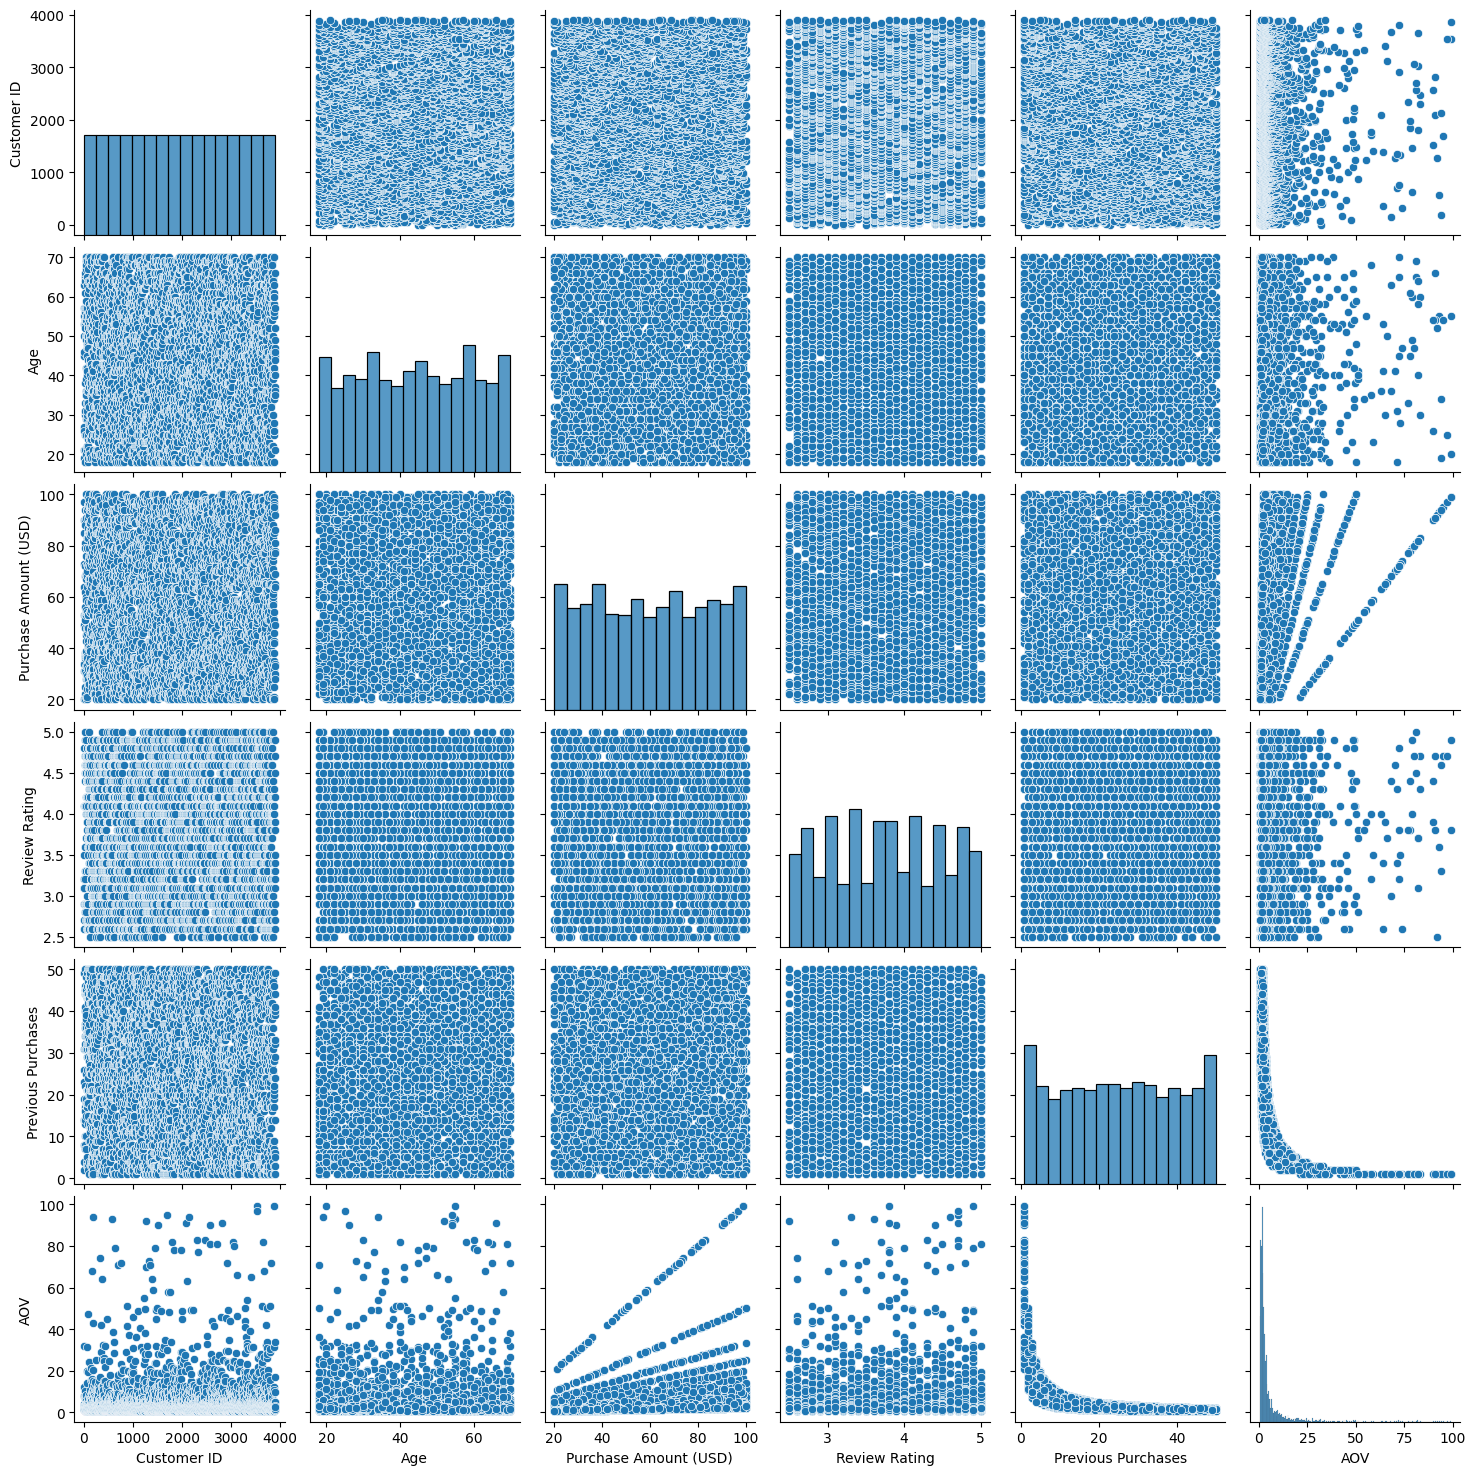

In [76]:
sns.pairplot(df_cst_cluster)

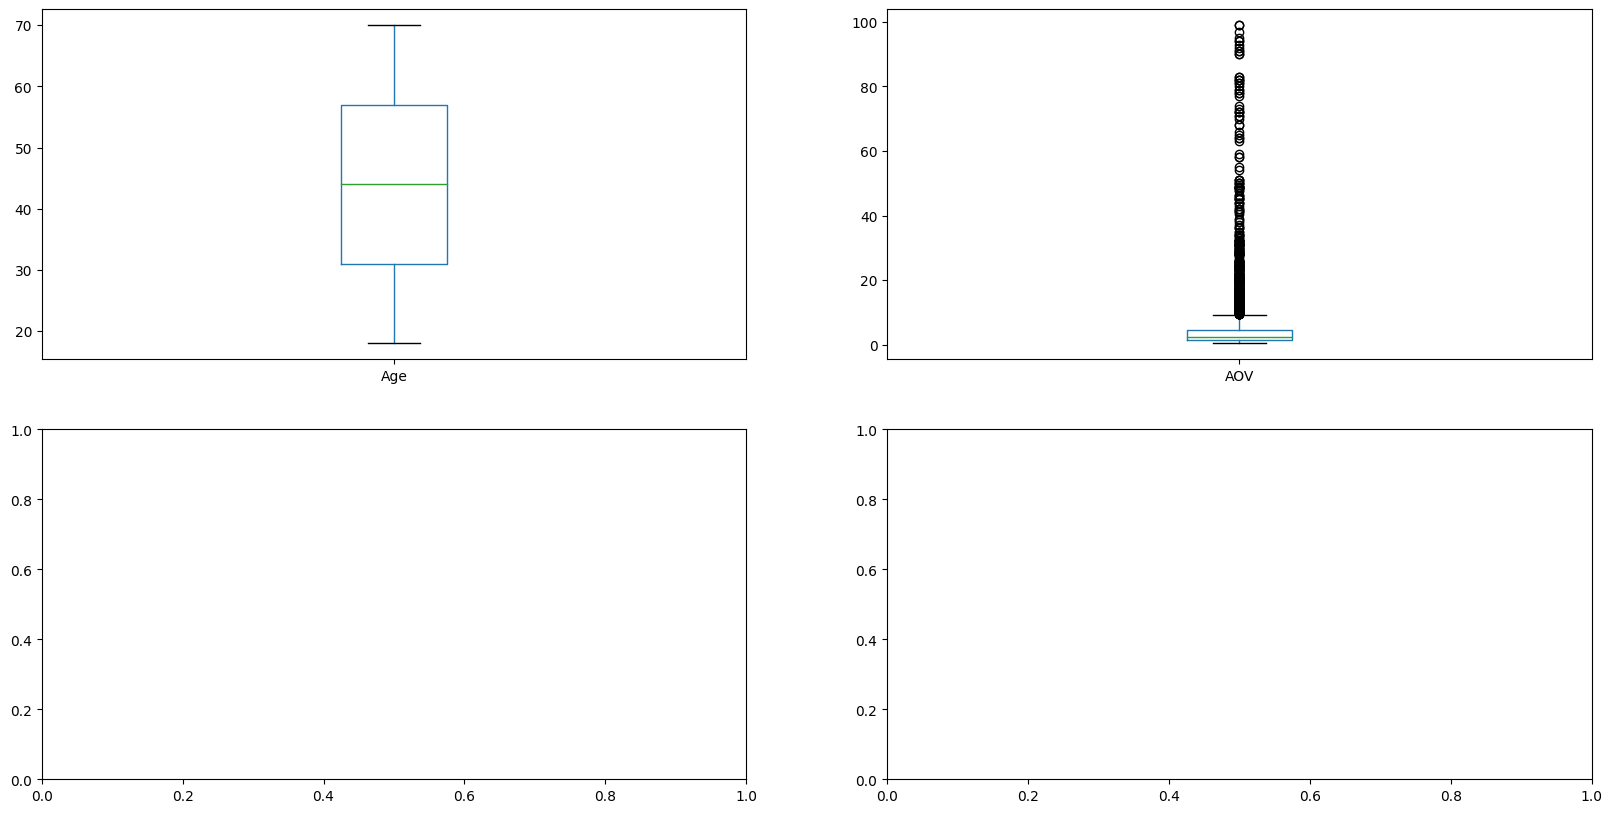

In [77]:
# filter numeric column
feature = ['Age', 'AOV']
#adjust chart position and chart size
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,10))

# for 0 (i) , Income (el)
for i,el in enumerate(feature):
    a = df_cst_cluster.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

## Scaler Method

### Standard Scaler

- Method: StandardScaler scales the features by removing the mean and scaling to unit variance.
- Characteristics: The resulting distribution has a mean of 0 and a standard deviation of 1.
- Use Case: It is suitable for algorithms that assume a Gaussian distribution of the input features, such as linear regression, logistic regression, and support vector machines.

In [78]:
# Define Standard Scale dataset
ss_scale_df = df_cst_cluster.copy()
column = ['Age', 'AOV']
# using StandardScaler Scaler
ss_scaler = StandardScaler()
ss_scale_df[column] = ss_scaler.fit_transform(ss_scale_df[column])

In [79]:
ss_scale_df[['Age', 'AOV']].head()

Age       AOV
0  0.718913 -0.164733
1 -1.648629  2.558377
2  0.390088 -0.223781
3 -1.517099 -0.352839
4  0.061263 -0.377556

### Robust Scaler

- Method: RobustScaler is less sensitive to outliers compared to StandardScaler. It scales the features using the interquartile range (IQR).
- Characteristics: RobustScaler is useful when the dataset contains outliers, as it does not rely on the mean and standard deviation.
- Use Case: It is recommended when the data has outliers, and the distribution of the features is not necessarily Gaussian.

In [80]:
# Define Robust Scale dataset
rs_scale_df = df_cst_cluster.copy()
column = df_cst_cluster.columns.to_list()
# using RobustScaler Scaler
rs_scaler = RobustScaler()
rs_scale_df[['Age', 'AOV']] = rs_scaler.fit_transform(rs_scale_df[['Age', 'AOV']])

In [81]:
rs_scale_df[['Age', 'AOV']].head()

Age       AOV
0  0.423077  0.457402
1 -0.961538  9.393017
2  0.230769  0.263641
3 -0.884615 -0.159850
4  0.038462 -0.240955

### Min Max Scaler

- Method: MinMaxScaler scales the features to a specified range, usually between 0 and 1.
- Characteristics: It preserves the shape of the original distribution and is sensitive to outliers.
- Use Case: MinMaxScaler is commonly used when the features need to be on a similar scale, and the algorithms, such as neural networks and k-nearest neighbors, are sensitive to the scale of the input features.

In [82]:
# Define Minmax Scale dataset
mm_scale_df = df_cst_cluster.copy()
column = df_cst_cluster.columns.to_list()
# using Minmax Scaler
mm_scaler = MinMaxScaler()
mm_scale_df[['Age', 'AOV']] = mm_scaler.fit_transform(mm_scale_df[['Age', 'AOV']])

In [83]:
mm_scale_df[['Age', 'AOV']].head()

Age       AOV
0  0.711538  0.034338
1  0.019231  0.320487
2  0.615385  0.028133
3  0.057692  0.014571
4  0.519231  0.011974

## Clustering Method

### Elbow Method

- Objective: The elbow method helps in finding the point on the plot where the increase in the number of clusters leads to diminishing returns in the reduction of the sum of squared distances within each cluster.
- Procedure:
  1. Fit the clustering algorithm with different values of k (number of clusters).
  2. For each k, compute the sum of squared distances (inertia or distortion) from each point to its assigned center.
  3. Plot the values of inertia against the number of clusters (k).
  4. Look for an "elbow" in the plot. The point where adding more clusters doesn't significantly reduce the sum of squared distances is considered a good choice for the number of clusters.
- Selection: The number of clusters corresponding to the elbow point is often chosen as the optimal number of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

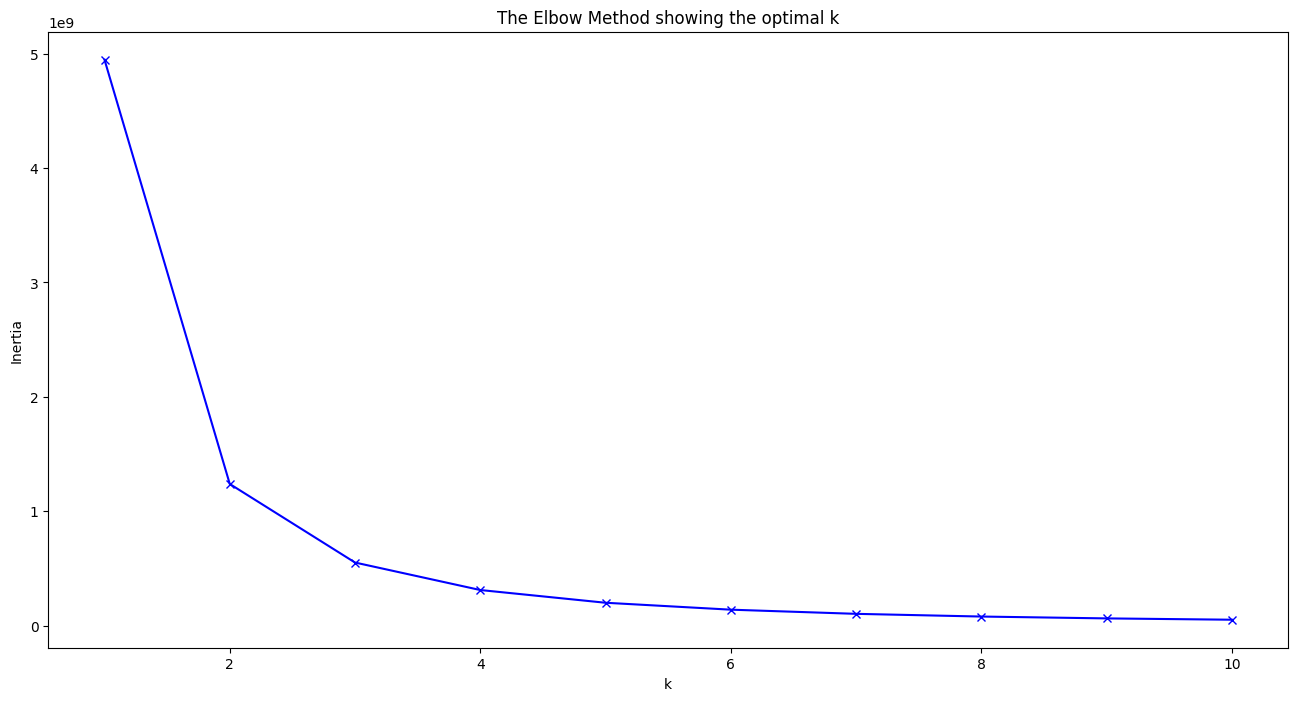

[4946260602.576659, 1238826442.0052595, 552289763.0635605, 312031952.9323256, 200834688.19998544, 140347811.19275862, 103949900.84215432, 80291185.0605008, 64087793.24053913, 52517497.20245817]


In [84]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(ss_scale_df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

### Silhouette Analysis
- Objective: The silhouette method evaluates how well-separated clusters are. It provides a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- Procedure:
  1. Fit the clustering algorithm with different values of k.
  2. For each k, calculate the silhouette score for each data point. The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
  3. Compute the average silhouette score for each k.
  Plot the average silhouette score against the number of clusters (k).
- Selection: Choose the number of clusters that maximizes the average silhouette score. A higher silhouette score suggests a better-defined separation between clusters.

In [85]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 5 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[1,2,3,4,5]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.4884948954237924


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5363132723389462


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5514954015569818


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.479182987028686


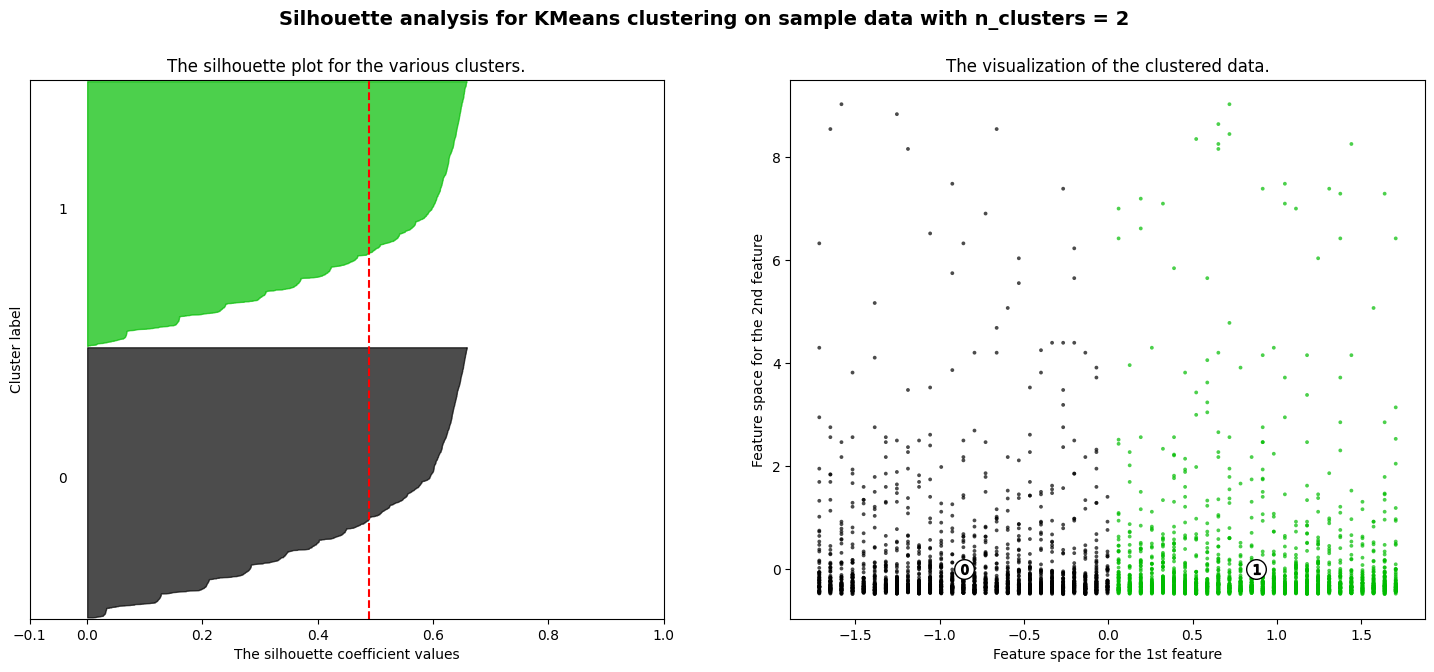

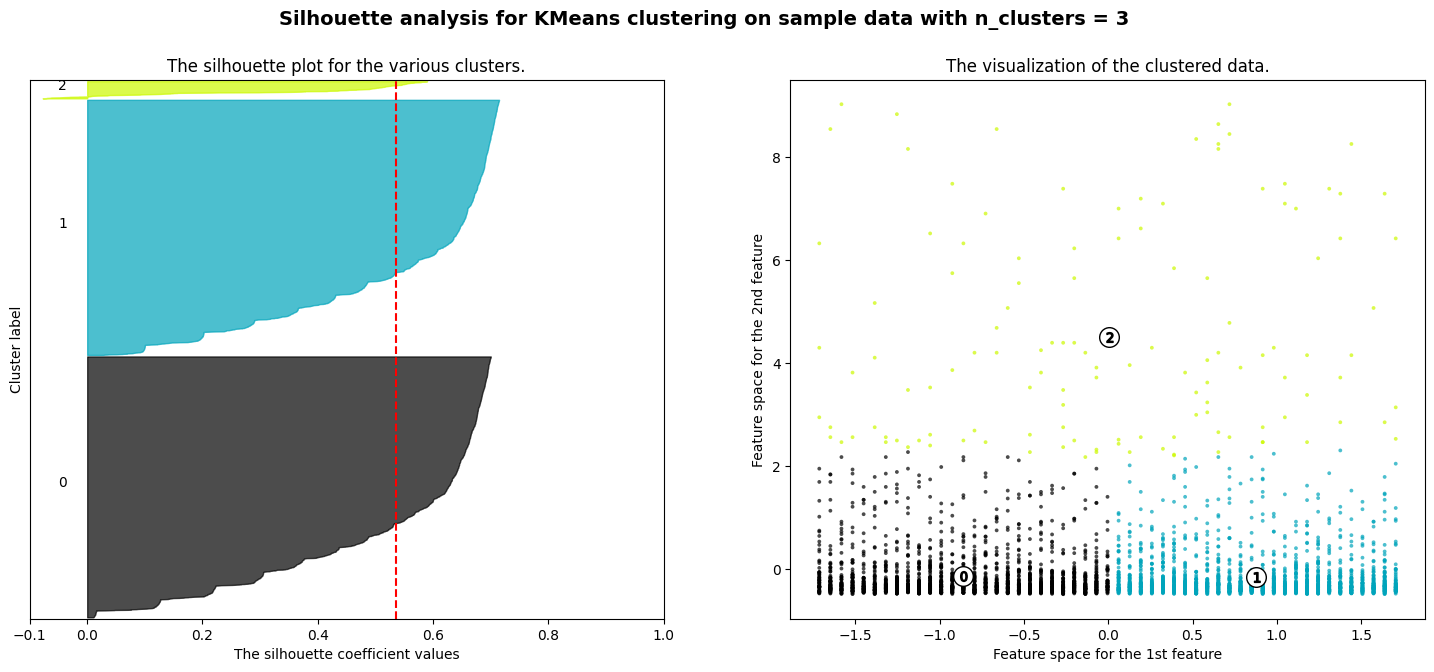

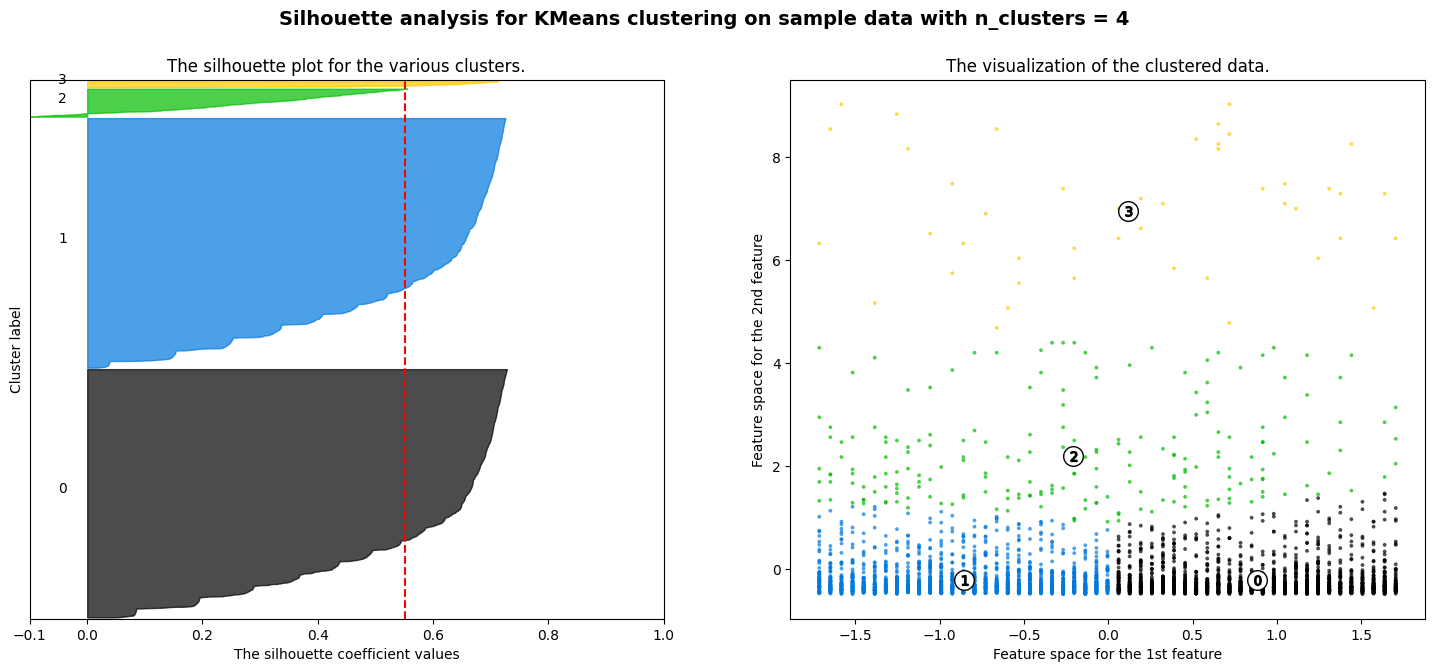

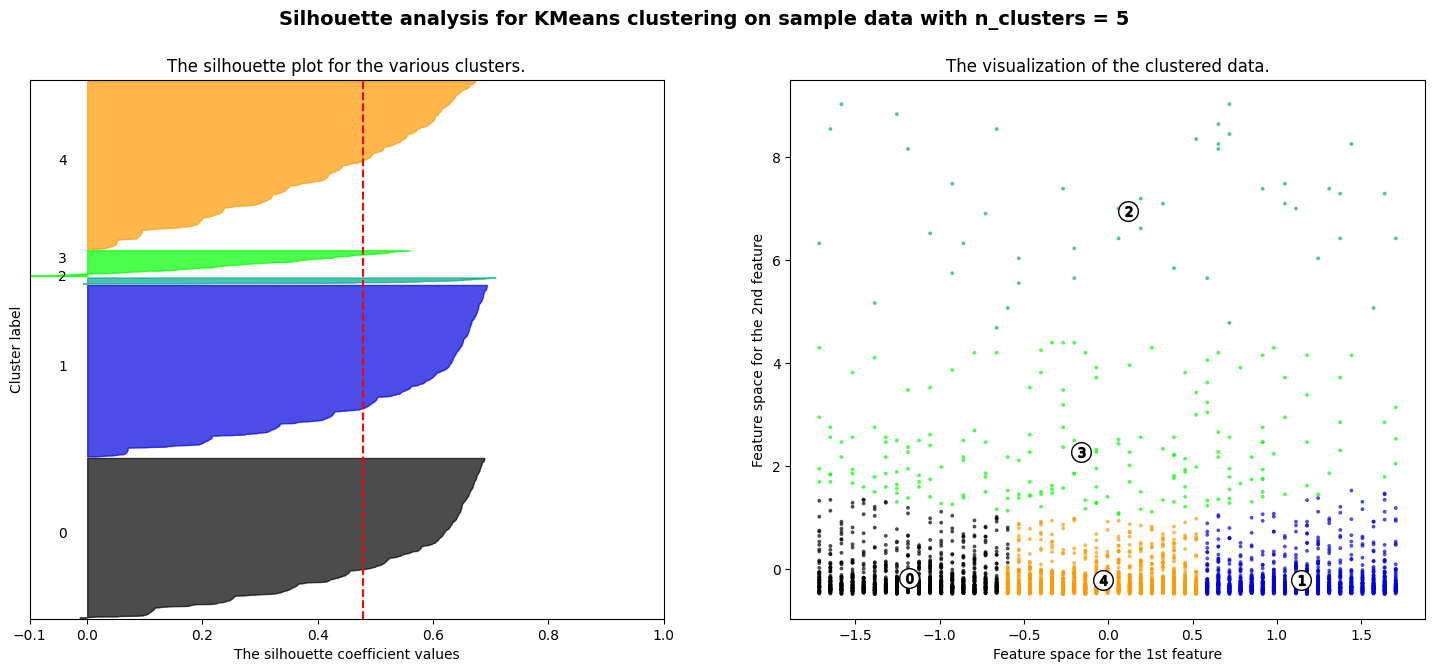

In [86]:
silhoutte_analysis(ss_scale_df[['Age', 'AOV']],list(range(2,6)))

## Final Check Cluster

To make sure
- k = 2 silhouette_score : 0.4884948954237924
- k = 3 silhouette_score : 0.5363132723389462
- k = 4 silhouette_score : 0.5514954015569818
- k = 5 silhouette_score : 0.479182987028686

### Review Cluster k=2

In [87]:
# make cluster k=2
Cluster_2 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=2)   # need to change
cluster_model.fit_predict(Cluster_2[['Age', 'AOV']])
Cluster_2['cluster'] = cluster_model.labels_
Cluster_2.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Customer ID       Age  Purchase Amount (USD)  Review Rating  \
0            1  0.718913                     53            3.1   
1            2 -1.648629                     64            3.1   
2            3  0.390088                     73            3.1   
3            4 -1.517099                     90            3.5   
4            5  0.061263                     49            2.7   

   Previous Purchases       AOV  cluster  
0                  14 -0.164733        1  
1                   2  2.558377        0  
2                  23 -0.223781        1  
3                  49 -0.352839        0  
4                  31 -0.377556        1

<Axes: xlabel='cluster', ylabel='Age'>

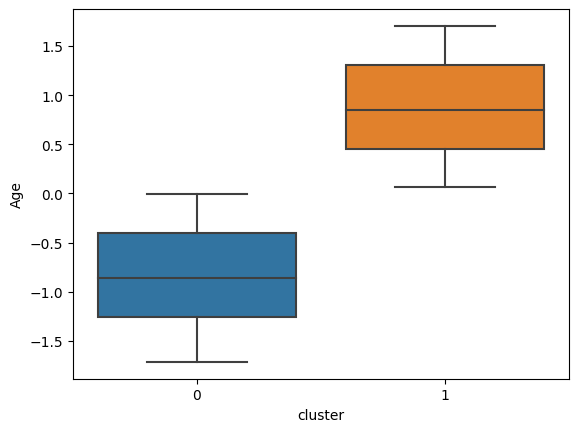

In [88]:
# Check age column
sns.boxplot (data =Cluster_2 , x ='cluster' , y ='Age')

<Axes: xlabel='cluster', ylabel='AOV'>

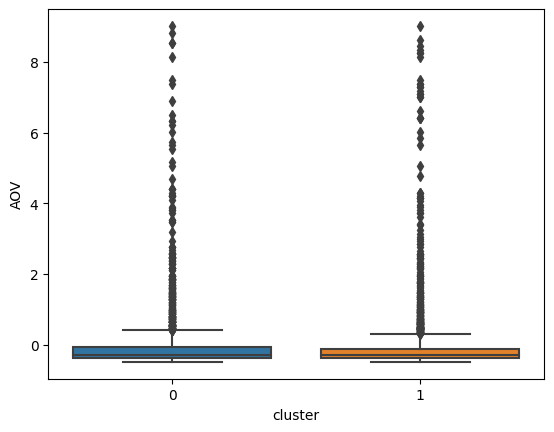

In [89]:
# Check purchase amount column
sns.boxplot (data =Cluster_2 , x ='cluster' , y ='AOV')

### Review Cluster k=3

In [90]:
# make cluster k=3
Cluster_3 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=3)   # need to change
cluster_model.fit_predict(Cluster_3[['Age', 'AOV']])
Cluster_3['cluster'] = cluster_model.labels_
Cluster_3.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Customer ID       Age  Purchase Amount (USD)  Review Rating  \
0            1  0.718913                     53            3.1   
1            2 -1.648629                     64            3.1   
2            3  0.390088                     73            3.1   
3            4 -1.517099                     90            3.5   
4            5  0.061263                     49            2.7   

   Previous Purchases       AOV  cluster  
0                  14 -0.164733        0  
1                   2  2.558377        2  
2                  23 -0.223781        0  
3                  49 -0.352839        1  
4                  31 -0.377556        0

<Axes: xlabel='cluster', ylabel='Age'>

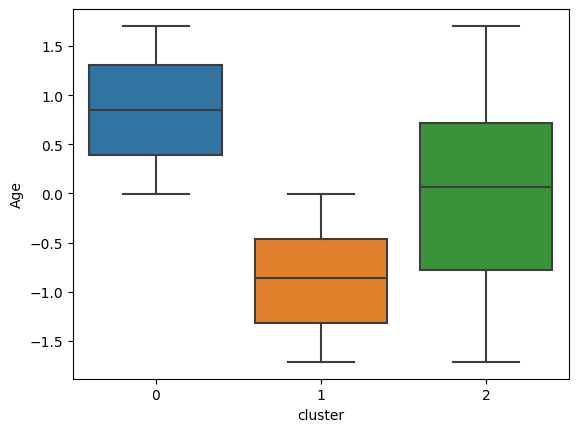

In [91]:
# Check age column
sns.boxplot (data =Cluster_3 , x ='cluster' , y ='Age')

<Axes: xlabel='cluster', ylabel='AOV'>

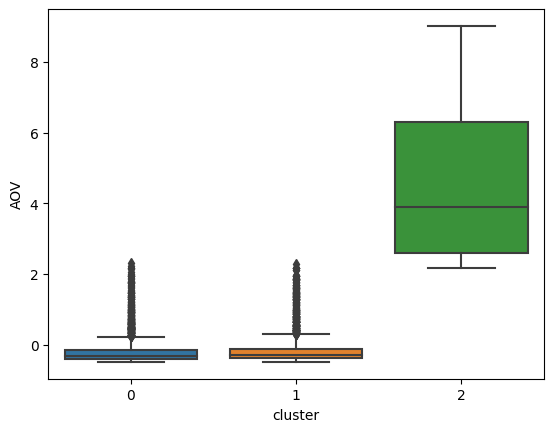

In [92]:
# Check purchase amount column
sns.boxplot (data =Cluster_3 , x ='cluster' , y ='AOV')

### Review Cluster k=4

In [93]:
# make cluster k=4
Cluster_4 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=4)   # need to change
cluster_model.fit_predict(Cluster_4[['Age', 'AOV']])
Cluster_4['cluster'] = cluster_model.labels_
Cluster_4.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Customer ID       Age  Purchase Amount (USD)  Review Rating  \
0            1  0.718913                     53            3.1   
1            2 -1.648629                     64            3.1   
2            3  0.390088                     73            3.1   
3            4 -1.517099                     90            3.5   
4            5  0.061263                     49            2.7   

   Previous Purchases       AOV  cluster  
0                  14 -0.164733        0  
1                   2  2.558377        3  
2                  23 -0.223781        0  
3                  49 -0.352839        1  
4                  31 -0.377556        0

<Axes: xlabel='cluster', ylabel='Age'>

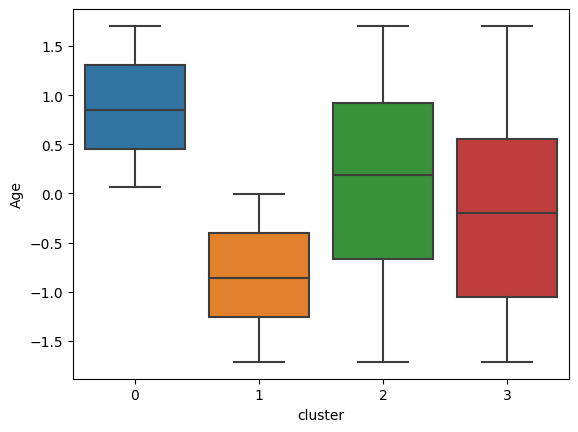

In [94]:
# Check age column
sns.boxplot (data =Cluster_4 , x ='cluster' , y ='Age')

<Axes: xlabel='cluster', ylabel='AOV'>

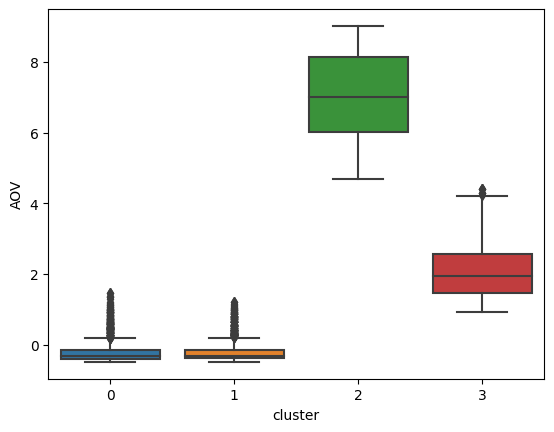

In [95]:
# Check purchase amount column
sns.boxplot (data =Cluster_4 , x ='cluster' , y ='AOV')

### Review Cluster k=5

In [96]:
# make cluster k=5
Cluster_5 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=5)   # need to change
cluster_model.fit_predict(Cluster_5[['Age', 'AOV']])
Cluster_5['cluster'] = cluster_model.labels_
Cluster_5.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Customer ID       Age  Purchase Amount (USD)  Review Rating  \
0            1  0.718913                     53            3.1   
1            2 -1.648629                     64            3.1   
2            3  0.390088                     73            3.1   
3            4 -1.517099                     90            3.5   
4            5  0.061263                     49            2.7   

   Previous Purchases       AOV  cluster  
0                  14 -0.164733        1  
1                   2  2.558377        3  
2                  23 -0.223781        4  
3                  49 -0.352839        0  
4                  31 -0.377556        4

<Axes: xlabel='cluster', ylabel='Age'>

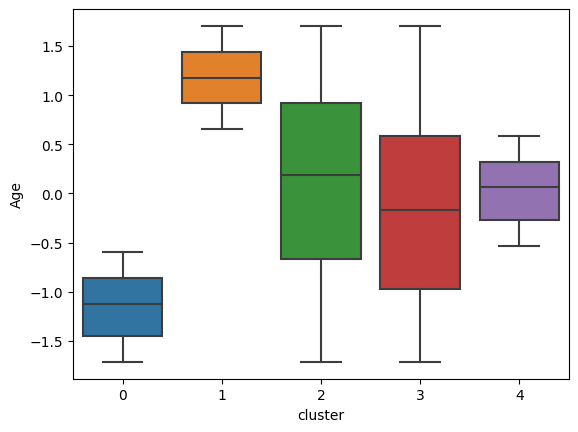

In [97]:
# Check age column
sns.boxplot (data =Cluster_5 , x ='cluster' , y ='Age')

<Axes: xlabel='cluster', ylabel='AOV'>

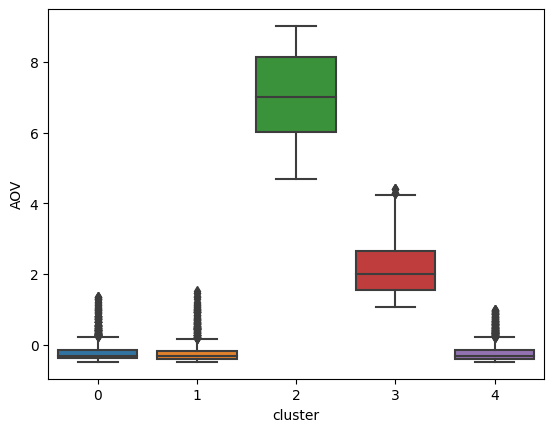

In [98]:
# Check purchase amount column
sns.boxplot (data =Cluster_5 , x ='cluster' , y ='AOV')

## Interpreting Cluster Result

Looks like:
- k=3 is our initial guess.
- k=4 has the highest silhouette score amoung all candidates
- k=5 cannot be right because cluster 4 is better

So we can conclude that 5 clusters is right to proceed.

In [112]:
# First, we create final dataset with 4 cluster labels
# Initialize KMeans for 4 clusters
cluster_model = KMeans(n_clusters = 3, random_state = 1000, n_init='auto')
cluster_model.fit(df_cst_cluster)

KMeans(n_clusters=3, n_init='auto', random_state=1000)

In [113]:
# Check up cluster label created by the KMeans
cluster_model.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [114]:
np.unique(cluster_model.labels_)

array([0, 1, 2], dtype=int32)

In [115]:
# Create a copy of the initial df and assign each accounts to a cluster
df_cst_cluster_3 = df_cst_cluster.copy()
df_cst_cluster_3['cluster'] = cluster_model.labels_
df_cst_cluster_3.head()

Customer ID  Age  Purchase Amount (USD)  Review Rating  Previous Purchases  \
0            1   55                     53            3.1                  14   
1            2   19                     64            3.1                   2   
2            3   50                     73            3.1                  23   
3            4   21                     90            3.5                  49   
4            5   45                     49            2.7                  31   

         AOV  cluster  
0   3.785714        2  
1  32.000000        2  
2   3.173913        2  
3   1.836735        2  
4   1.580645        2

In [116]:
df_cst_cluster_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer ID            3900 non-null   int64  
 1   Age                    3900 non-null   int64  
 2   Purchase Amount (USD)  3900 non-null   int64  
 3   Review Rating          3900 non-null   float64
 4   Previous Purchases     3900 non-null   int64  
 5   AOV                    3900 non-null   float64
 6   cluster                3900 non-null   int32  
dtypes: float64(2), int32(1), int64(4)
memory usage: 198.2 KB


In [117]:
# Checking the values for cluster
df_cst_cluster_3[df_cst_cluster_3.columns[6]].value_counts()

1    1308
0    1300
2    1292
Name: cluster, dtype: int64

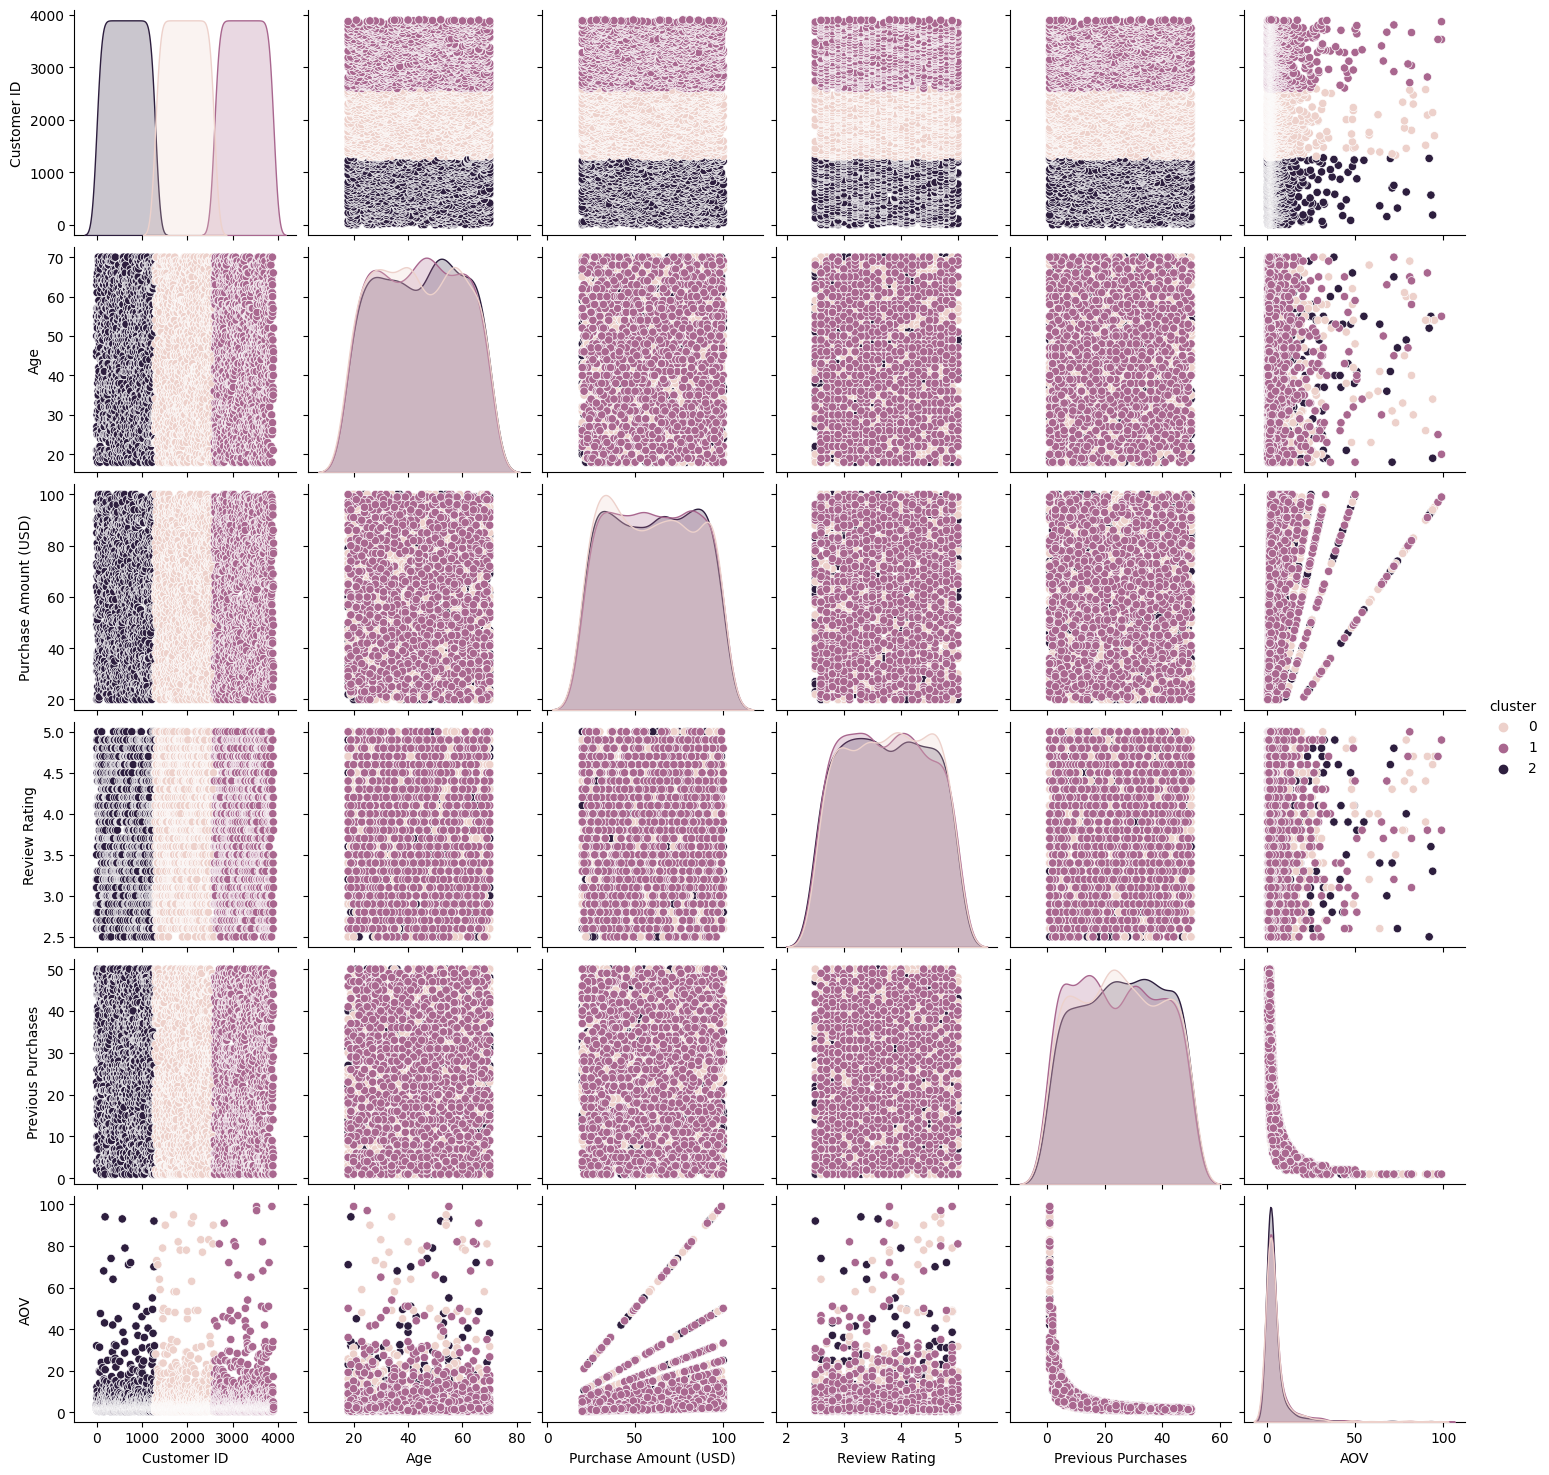

In [118]:
# Let's re-look into data after clustering
# This take some time, no worries!
sns.pairplot(df_cst_cluster_3,hue='cluster')

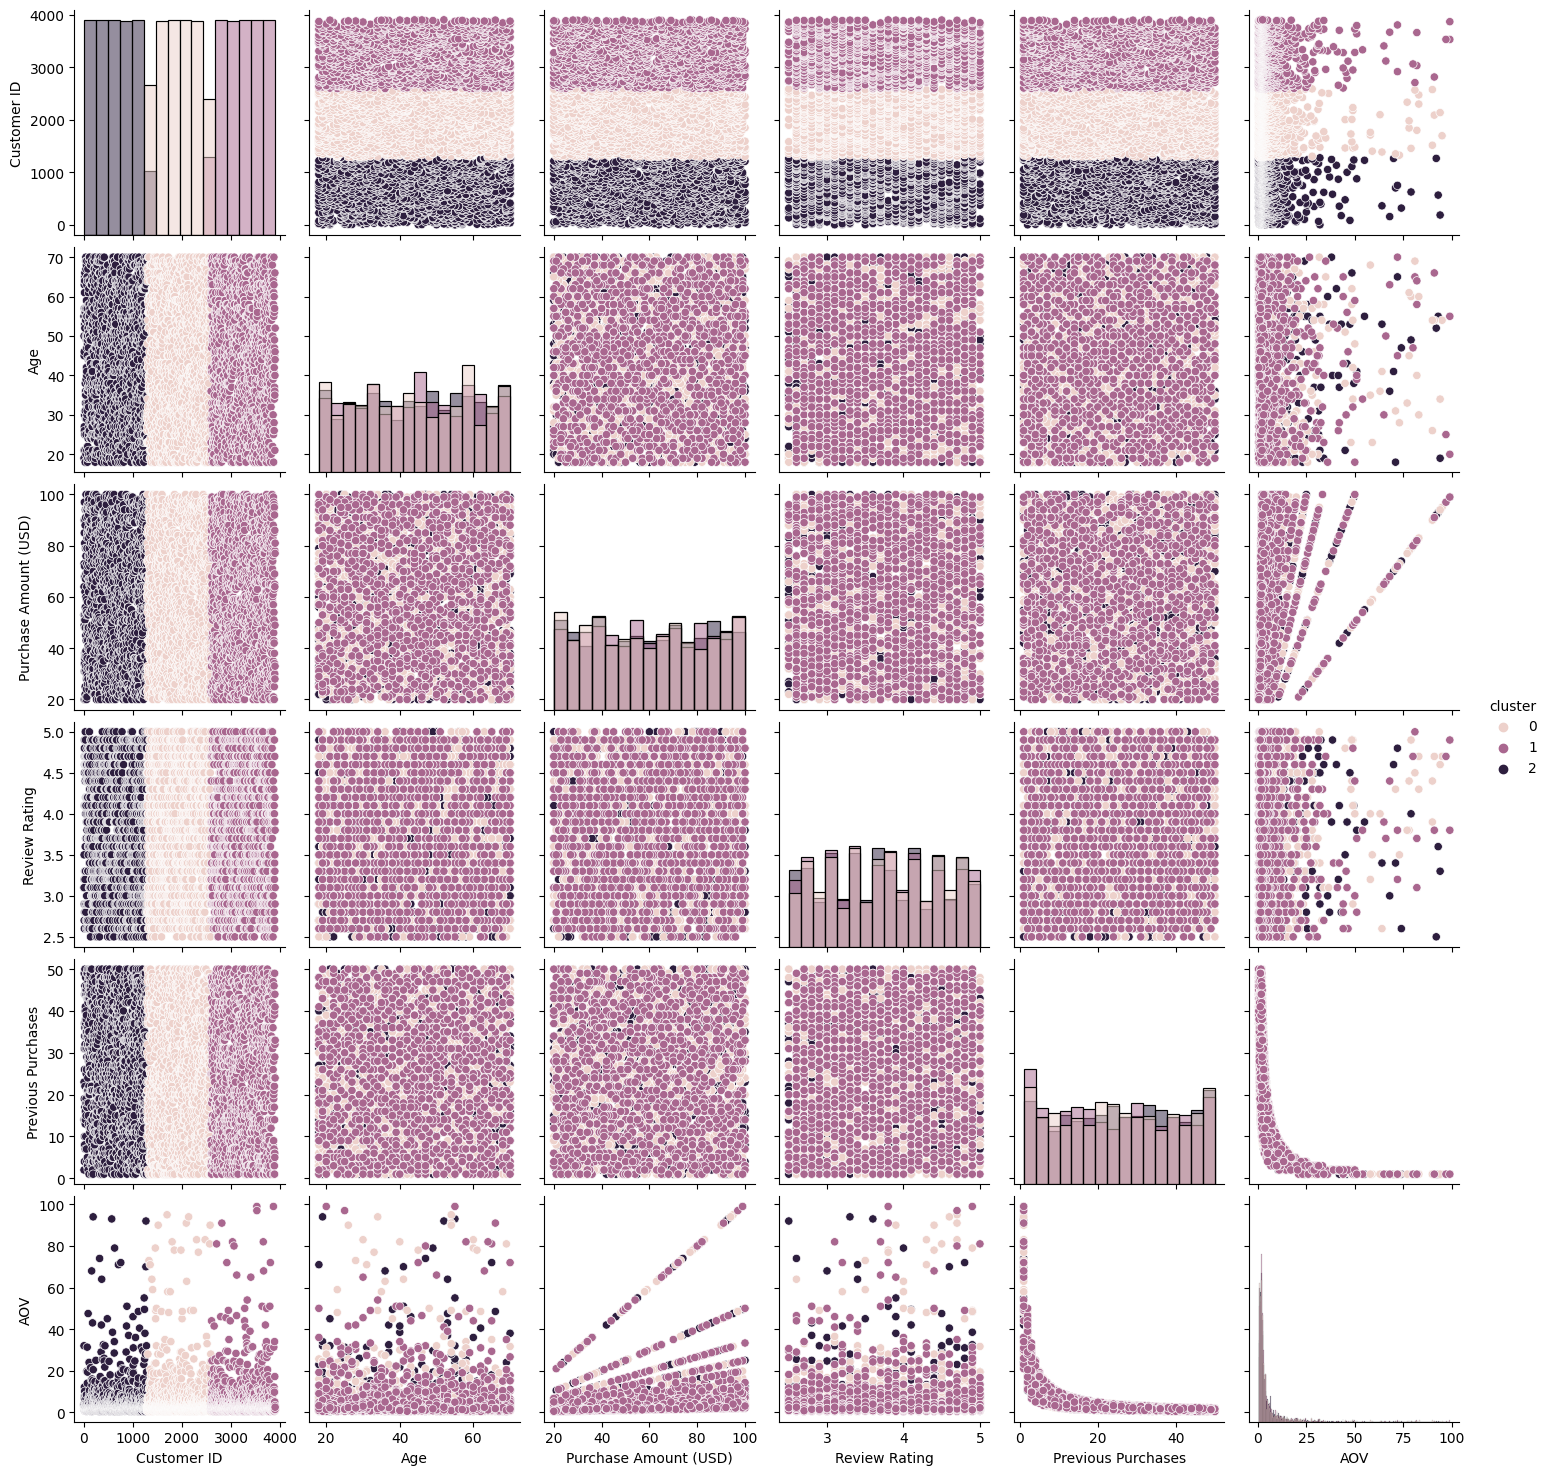

In [119]:
# Let's re-look into data after clustering
# This take some time, no worries!
sns.pairplot(df_cst_cluster_3,hue='cluster', diag_kind="hist")

In [120]:
# It's also typical to look into averages of values
df_cst_cluster_3.groupby('cluster').mean(numeric_only='True').T

cluster                          0            1           2
Customer ID            1942.500000  3246.500000  646.500000
Age                      43.815385    44.004587   44.387771
Purchase Amount (USD)    59.231538    60.220948   59.838235
Review Rating             3.772385     3.739067    3.738390
Previous Purchases       25.359231    24.587920   26.116873
AOV                       5.645599     5.853275    4.973274

In [121]:
# Create a copy of the initial df and assign each accounts to a cluster
df_cst_cluster_final = df_cst_eda.copy()
df_cst_cluster_final['cluster'] = cluster_model.labels_
df_cst_cluster_final.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases                             Age Group  \
0          Venmo            Fortnightly            50-64 years old (Seniours)   
1           Cash            Fortnightly        18-24 years old (Young Adults)   
2    Credit Card                 Weekly            50-64 years old (Seniours)   
3         PayPal                 Weekly        18-24 years old (Young Adults)   
4         PayPal               Annually  35-49 years old (Middle-aged Adults)   

   cluster  
0        2  
1        2  
2        2  
3        2  
4        2

In [122]:
# And to check the pivot table of each categorical columns
for col in df_cst_cluster_final.select_dtypes(include='object').columns:

  # Create crosstab by columns
  df_pivot = df_cst_cluster_final[['cluster',col]].groupby('cluster').value_counts().reset_index().rename(columns = {0: 'values'})

  # Display pivot_table
  display(df_pivot.pivot(index=col, columns='cluster', values='values').fillna(0))

  print('\n')

cluster       0       1       2
Gender                         
Female      0.0  1248.0     0.0
Male     1300.0    60.0  1292.0

cluster          0   1   2
Item Purchased            
Backpack        55  40  48
Belt            55  57  49
Blouse          66  69  36
Boots           42  50  52
Coat            50  48  63
Dress           53  55  58
Gloves          54  40  46
Handbag         46  59  48
Hat             42  52  60
Hoodie          40  54  57
Jacket          55  59  49
Jeans           46  30  48
Jewelry         60  54  57
Pants           57  53  61
Sandals         51  61  48
Scarf           57  48  52
Shirt           49  62  58
Shoes           47  53  50
Shorts          55  50  52
Skirt           56  54  48
Sneakers        50  43  52
Socks           59  59  41
Sunglasses      53  59  49
Sweater         50  51  63
T-shirt         52  48  47

cluster        0    1    2
Category                  
Accessories  422  409  409
Clothing     583  585  569
Footwear     190  207  202
Outerwear    105  107  112

cluster          0   1   2
Location                  
Alabama         35  29  25
Alaska          26  26  20
Arizona         21  26  18
Arkansas        28  26  25
California      33  29  33
Colorado        24  30  21
Connecticut     26  29  23
Delaware        28  25  33
Florida         23  20  25
Georgia         22  31  26
Hawaii          28  15  22
Idaho           31  35  27
Illinois        32  31  29
Indiana         31  18  30
Iowa            21  20  28
Kansas          22  30  11
Kentucky        18  30  31
Louisiana       22  31  31
Maine           28  29  20
Maryland        29  29  28
Massachusetts   27  17  28
Michigan        30  25  18
Minnesota       29  29  30
Mississippi     27  27  26
Missouri        32  19  30
Montana         30  39  27
Nebraska        31  29  27
Nevada          20  32  35
New Hampshire   22  24  25
New Jersey      20  24  23
New Mexico      33  22  26
New York        33  26  28
North Carolina  23  24  31
North Dakota    29  25  29
Ohio            21  29  27
Oklahoma        22  24  29
Oregon          27  22  25
Pennsylvania    18  27  29
Rhode Island    19  24  20
South Carolina  21  23  32
South Dakota    25  24  21
Tennessee       28  28  21
Texas           25  33  19
Utah            18  28  25
Vermont         33  25  27
Virginia        27  24  26
Washington      23  26  24
West Virginia   24  24  33
Wisconsin       30  25  20
Wyoming         25  21  25

cluster    0    1    2
Size                  
L        353  351  349
M        562  616  577
S        245  197  221
XL       140  144  145

cluster     0   1   2
Color                
Beige      53  42  52
Black      59  60  48
Blue       49  52  51
Brown      54  47  40
Charcoal   42  50  61
Cyan       60  49  57
Gold       56  44  38
Gray       55  55  49
Green      56  56  57
Indigo     48  49  50
Lavender   47  50  50
Magenta    47  60  45
Maroon     52  59  47
Olive      48  63  66
Orange     49  53  52
Peach      53  52  44
Pink       50  60  43
Purple     52  44  55
Red        50  45  53
Silver     61  56  56
Teal       57  56  59
Turquoise  47  44  54
Violet     55  55  56
White      42  46  54
Yellow     58  61  55

cluster    0    1    2
Season                
Fall     316  344  315
Spring   323  335  341
Summer   331  313  311
Winter   330  316  325

cluster                   0       1       2
Subscription Status                        
No                   1300.0  1308.0   239.0
Yes                     0.0     0.0  1053.0

cluster           0    1    2
Shipping Type                
2-Day Shipping  218  215  194
Express         208  206  232
Free Shipping   209  256  210
Next Day Air    233  202  213
Standard        218  220  216
Store Pickup    214  209  227

cluster               0       1       2
Discount Applied                       
No                915.0  1308.0     0.0
Yes               385.0     0.0  1292.0

cluster              0       1       2
Promo Code Used                       
No               915.0  1308.0     0.0
Yes              385.0     0.0  1292.0

cluster           0    1    2
Payment Method               
Bank Transfer   200  217  195
Cash            235  223  212
Credit Card     215  235  221
Debit Card      220  189  227
PayPal          232  227  218
Venmo           198  217  219

cluster                   0    1    2
Frequency of Purchases               
Annually                182  201  189
Bi-Weekly               178  197  172
Every 3 Months          191  195  198
Fortnightly             182  170  190
Monthly                 182  191  180
Quarterly               210  178  175
Weekly                  175  176  188

cluster                                  0    1    2
Age Group                                           
18-24 years old (Young Adults)         168  163  155
25-34 years old (Young Proffesionals)  256  253  246
35-49 years old (Middle-aged Adults)   365  378  357
50-64 years old (Seniours)             361  380  391
65-71 years old (Elderly)              150  134  143

In [123]:
# Interpreting Clustering
# Cluster 0: male only, mostly purchase in summer, no subscription status, mostly not used promo
# Cluster 1: female & male, mostly purchase in fall, no subscription status, not used promo
# Cluster 2: male only, mostly purchase in spring, mostly subscription status, used promo

In [124]:
# Insight & Recommendation
# Cluster 0: need to convert male customer to subscribe & used promo.
# Cluster 1: need to observe customer behaviour.
# Cluster 2: need to convert male customer to subsctibe

In [110]:
#Export data set pandas to csv
df_cst_cluster_final.to_csv('customer_shopping_trend_edit.csv', index=False)